In [1]:
import time
from sim_interface import SimInterface as Sim
import threading
import numpy as np
%load_ext autoreload
%autoreload 3
%matplotlib qt

In [2]:
import math
 
def euler_from_quaternion(x, y, z, w):
        """
        Convert a quaternion into euler angles (roll, pitch, yaw)
        roll is rotation around x in radians (counterclockwise)
        pitch is rotation around y in radians (counterclockwise)
        yaw is rotation around z in radians (counterclockwise)
        """
        t0 = +2.0 * (w * x + y * z)
        t1 = +1.0 - 2.0 * (x * x + y * y)
        roll_x = math.atan2(t0, t1)
     
        t2 = +2.0 * (w * y - z * x)
        t2 = +1.0 if t2 > +1.0 else t2
        t2 = -1.0 if t2 < -1.0 else t2
        pitch_y = math.asin(t2)
     
        t3 = +2.0 * (w * z + x * y)
        t4 = +1.0 - 2.0 * (y * y + z * z)
        yaw_z = math.atan2(t3, t4)
     
        return roll_x, pitch_y, yaw_z # in radians

In [9]:
dummy_script_cross1 = \
[[0, -684.42, 661.72, 96.48, 0.056,  -0.054,  0.725,  0.685],
[1, -682.73, 661.59, 96.26, 0.048,  -0.044,  0.730,  0.680],
[2, -677.48, 661.25, 95.53, 0.050,  -0.049,  0.725,  0.685],
[3, -667.96, 660.91, 94.20, 0.053,  -0.051,  0.715,  0.695],
[4, -659.88, 660.68, 93.07, 0.055,  -0.054,  0.715,  0.695],
[5, -651.68, 660.48, 91.98, 0.043,  -0.043,  0.714,  0.698],
[6, -643.40, 660.30, 91.70, 0.002,  -0.004,  0.715,  0.699],
[7, -635.37, 660.03, 91.69, 0.005,  0.001,  0.721,  0.693],
[8, -627.59, 659.39, 91.71, 0.005,  -0.003,  0.748,  0.664],
[9, -619.71, 657.63, 91.71, 0.007,  -0.003,  0.803,  0.596],
[10, -611.96, 654.07, 91.69, 0.008,  -0.007,  0.865,  0.501],
[11, -604.99, 648.85, 91.56, 0.008,  -0.014,  0.907,  0.421],
[12, -598.47, 642.65, 91.38, 0.008,  -0.017,  0.923,  0.384],
[13, -592.82, 636.87, 91.22, 0.006,  -0.015,  0.927,  0.376],
[14, -587.41, 631.29, 91.05, 0.006,  -0.015,  0.927,  0.375],
[15, -581.53, 625.22, 90.91, 0.005,  -0.013,  0.927,  0.375],
[16, -575.39, 618.87, 90.73, 0.006,  -0.015,  0.927,  0.375],
[17, -569.58, 612.88, 90.55, 0.002,  -0.017,  0.927,  0.375],
[18, -563.98, 607.11, 90.41, 0.006,  -0.011,  0.927,  0.376],
[19, -558.50, 601.47, 90.25, 0.006,  -0.014,  0.927,  0.376],
[20, -553.04, 595.85, 90.12, 0.008,  -0.010,  0.927,  0.376],
[21, -547.53, 590.17, 90.11, 0.000,  -0.004,  0.927,  0.376],
[22, -541.73, 584.21, 90.13, 0.003,  -0.006,  0.927,  0.376],
[23, -535.86, 578.16, 90.18, -0.004,  0.008,  0.926,  0.376],
[24, -529.90, 572.07, 90.73, -0.013,  0.031,  0.925,  0.378],
[25, -524.38, 566.51, 91.34, -0.012,  0.031,  0.924,  0.381],
[26, -519.50, 561.64, 91.87, -0.014,  0.030,  0.923,  0.384],
[27, -515.04, 557.22, 92.35, -0.014,  0.040,  0.922,  0.384],
[28, -509.26, 551.49, 92.99, -0.014,  0.035,  0.922,  0.384],
[29, -503.05, 545.33, 93.66, -0.013,  0.032,  0.922,  0.385],
[30, -496.79, 539.14, 94.33, -0.013,  0.029,  0.922,  0.385],
[31, -490.57, 532.96, 95.01, -0.012,  0.030,  0.923,  0.384],
[32, -484.86, 527.30, 95.63, -0.014,  0.029,  0.923,  0.384],
[33, -479.54, 522.04, 96.20, -0.011,  0.030,  0.923,  0.385],
[34, -477.52, 520.04, 96.41, -0.010,  0.024,  0.923,  0.384],
[35, -477.48, 520.00, 96.43, -0.011,  0.026,  0.923,  0.384],
[36, -477.50, 520.01, 96.43, -0.010,  0.024,  0.923,  0.384],
[37, -477.50, 520.01, 96.42, -0.011,  0.025,  0.923,  0.384],
[38, -477.50, 520.01, 96.42, -0.011,  0.025,  0.923,  0.384],
[39, -477.54, 520.05, 96.42, -0.011,  0.026,  0.923,  0.384],
[40, -477.35, 519.86, 96.43, -0.011,  0.027,  0.923,  0.384],
[41, -477.36, 519.87, 96.43, -0.011,  0.027,  0.923,  0.384],
[42, -477.36, 519.87, 96.43, -0.011,  0.027,  0.923,  0.384],
[43, -477.49, 520.00, 96.43, -0.011,  0.026,  0.923,  0.384],
[44, -477.49, 520.00, 96.42, -0.012,  0.027,  0.923,  0.384],
[45, -477.49, 520.00, 96.42, -0.012,  0.027,  0.923,  0.384],
[46, -477.49, 520.00, 96.42, -0.012,  0.027,  0.923,  0.384],
[47, -477.55, 520.06, 96.42, -0.012,  0.027,  0.923,  0.384],
[48, -477.42, 519.94, 96.41, -0.011,  0.028,  0.923,  0.384],
[49, -477.42, 519.93, 96.42, -0.012,  0.029,  0.923,  0.384],
[50, -477.42, 519.93, 96.42, -0.012,  0.029,  0.923,  0.384],
[51, -477.50, 520.01, 96.41, -0.010,  0.024,  0.923,  0.385],
[52, -477.50, 520.01, 96.42, -0.011,  0.026,  0.923,  0.385],
[53, -477.50, 520.01, 96.42, -0.011,  0.026,  0.923,  0.385],
[54, -477.50, 520.01, 96.42, -0.011,  0.026,  0.923,  0.385],
[55, -477.50, 520.01, 96.42, -0.011,  0.027,  0.923,  0.384],
[56, -477.55, 520.06, 96.42, -0.012,  0.029,  0.923,  0.384],
[57, -477.34, 519.86, 96.43, -0.012,  0.026,  0.923,  0.384],
[58, -477.35, 519.87, 96.43, -0.012,  0.026,  0.923,  0.384],
[59, -477.35, 519.86, 96.44, -0.012,  0.026,  0.923,  0.384]]


In [4]:
dummy_script_hotel = \
[[0, -584.10, 198.99, 110.15, 0.030,  -0.085,  0.921,  0.379],
[1, -584.09, 198.98, 110.16, 0.030,  -0.084,  0.921,  0.379],
[2, -583.18, 198.07, 109.96, 0.031,  -0.082,  0.921,  0.379],
[3, -580.40, 195.21, 109.27, 0.029,  -0.081,  0.922,  0.378],
[4, -575.65, 190.55, 108.09, 0.026,  -0.083,  0.920,  0.382],
[5, -569.25, 184.49, 106.54, 0.015,  -0.088,  0.915,  0.393],
[6, -561.72, 177.01, 104.68, 0.017,  -0.087,  0.921,  0.380],
[7, -552.46, 169.53, 102.60, 0.000,  -0.095,  0.896,  0.435],
[8, -540.34, 164.01, 100.76, -0.003,  -0.085,  0.832,  0.548],
[9, -526.94, 162.16, 100.57, -0.004,  -0.001,  0.739,  0.673],
[10, -513.37, 161.61, 100.52, -0.005,  -0.007,  0.719,  0.695],
[11, -500.00, 160.89, 100.56, -0.004,  -0.003,  0.725,  0.688],
[12, -487.64, 157.79, 100.57, -0.006,  -0.003,  0.791,  0.612],
[13, -477.35, 153.57, 100.56, -0.011,  -0.007,  0.825,  0.565],
[14, -468.51, 150.88, 100.54, -0.006,  -0.004,  0.809,  0.587],
[15, -459.80, 147.74, 100.44, -0.002,  -0.007,  0.815,  0.579],
[16, -450.92, 145.10, 100.33, -0.012,  -0.016,  0.802,  0.596],
[17, -441.93, 147.04, 100.28, -0.016,  -0.024,  0.661,  0.750],
[18, -437.28, 154.19, 100.32, 0.009,  0.023,  -0.387,  -0.922],
[19, -435.64, 161.91, 100.44, 0.004,  -0.004,  -0.202,  -0.979],
[20, -432.37, 168.58, 100.49, 0.006,  0.005,  -0.215,  -0.977],
[21, -429.11, 175.61, 100.54, 0.005,  0.005,  -0.215,  -0.977],
[22, -425.60, 182.84, 100.61, 0.006,  0.008,  -0.220,  -0.976],
[23, -422.26, 189.83, 100.67, 0.006,  0.007,  -0.220,  -0.975],
[24, -418.79, 196.47, 100.74, 0.006,  0.007,  -0.230,  -0.973],
[25, -415.51, 202.97, 100.80, 0.007,  0.007,  -0.231,  -0.973],
[26, -412.34, 209.25, 100.86, 0.007,  0.007,  -0.231,  -0.973],
[27, -409.22, 215.14, 100.93, 0.006,  0.005,  -0.238,  -0.971],
[28, -406.10, 220.89, 100.99, 0.007,  0.006,  -0.242,  -0.970],
[29, -402.76, 226.39, 101.04, 0.007,  0.008,  -0.257,  -0.966]]

In [5]:
dummy_script_harbor = \
[[0, -318.26, 496.50, 82.22, -0.078,  0.038,  -0.380,  -0.921],
[1, -318.26, 496.50, 82.22, -0.078,  0.038,  -0.380,  -0.921],
[2, -318.26, 496.50, 82.22, -0.078,  0.038,  -0.380,  -0.921],
[3, -317.67, 497.08, 82.09, -0.077,  0.036,  -0.380,  -0.921],
[4, -315.20, 499.57, 81.44, -0.078,  0.039,  -0.380,  -0.921],
[5, -310.63, 504.18, 80.33, -0.079,  0.035,  -0.379,  -0.922],
[6, -304.01, 510.88, 78.66, -0.079,  0.042,  -0.379,  -0.921],
[7, -296.06, 518.84, 76.67, -0.080,  0.044,  -0.380,  -0.920],
[8, -289.11, 525.74, 75.17, -0.068,  0.039,  -0.382,  -0.921],
[9, -280.55, 532.20, 75.14, -0.001,  -0.011,  -0.448,  -0.894],
[10, -270.52, 532.79, 75.09, 0.017,  0.013,  0.664,  0.748],
[11, -263.94, 527.02, 75.12, 0.028,  0.015,  0.873,  0.487],
[12, -260.54, 519.45, 75.12, -0.005,  -0.001,  0.955,  0.295],
[13, -253.76, 514.38, 75.10, -0.001,  -0.001,  0.909,  0.417],
[14, -246.15, 510.18, 75.10, 0.006,  0.003,  0.876,  0.482],
[15, -237.30, 505.63, 75.10, 0.007,  0.005,  0.855,  0.519],
[16, -226.65, 502.63, 75.08, -0.008,  -0.007,  0.798,  0.603],
[17, -215.75, 502.51, 75.09, 0.006,  0.006,  0.723,  0.691],
[18, -205.32, 502.00, 75.11, 0.004,  0.005,  0.724,  0.690],
[19, -194.92, 501.59, 75.09, 0.002,  0.001,  0.722,  0.692],
[20, -184.59, 501.21, 75.09, 0.002,  0.001,  0.720,  0.694],
[21, -174.48, 501.08, 75.08, -0.002,  -0.004,  0.712,  0.702],
[22, -166.67, 504.46, 75.12, -0.006,  -0.006,  0.585,  0.811],
[23, -164.69, 510.02, 75.11, -0.001,  0.003,  -0.370,  -0.929],
[24, -166.12, 515.50, 75.12, -0.001,  0.005,  -0.125,  -0.992],
[25, -169.26, 519.28, 75.12, -0.000,  -0.009,  0.086,  -0.996],
[26, -171.11, 522.74, 75.08, -0.001,  -0.017,  0.145,  -0.989],
[27, -170.38, 526.28, 75.09, -0.001,  -0.018,  0.051,  -0.999],
[28, -168.71, 528.04, 75.10, -0.001,  0.002,  -0.056,  -0.998],
[29, -168.72, 528.02, 75.12, 0.001,  -0.003,  -0.055,  -0.998]]

In [10]:
from math import atan2
import numpy as np

def wrap_angle(angles):
    return (angles + np.pi) % (2 * np.pi) - np.pi

def create_dummy_path(script):
    dummy_data = []
    for s in script:
        dummy_data.append([s[0]*1, s[1], s[2], s[3], 0])

    for i in range(len(script)):
        x = euler_from_quaternion(script[i][4], script[i][5], script[i][6], script[i][7])
        dummy_data[i][4] = wrap_angle(-x[2]) + np.pi/2
    brr = []
    for node in dummy_data:
        brr.append({'x':node[1], 'y':node[2], 'z':node[3], 't':node[0], 'theta':node[4]})
    name = f"{dummy_script_hotel=}".split('=')[0]
    # np.save(f"{name}.npy", brr)
    return dummy_data


In [11]:
import numpy as np
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
from shapely.ops import unary_union
from shapely.validation import make_valid
import geopandas as gpd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]

base_path = "C:/Users/user/Documents/pytorch-motion-planner"
roads=np.load(f"{base_path}/beamng/roads.npy", allow_pickle=True)
roads = [roads[0]]
j = 0
for road in roads:
    j += len(road)
points = np.zeros((int(2*j), 2), dtype=np.float32)
k = 0
polys = []
for i in range(len(roads)):
    poly = []
    tmp = k
    for j in range(len(roads[i])):
        points[k][0] = np.around(roads[i][j]["right"][0],decimals=1)
        points[k][1] = np.around(roads[i][j]["right"][1],decimals=1)
        poly.append([points[k][0], points[k][1]])
        k += 1
    tmp = []
    for j in range(len(roads[i])):
        points[k][0] = np.around(roads[i][j]["left"][0],decimals=1)
        points[k][1] = np.around(roads[i][j]["left"][1],decimals=1)
        tmp.append([points[k][0], points[k][1]])
        k += 1
    poly += tmp[::-1]
    polys.append(make_valid(Polygon(poly)))

boundary = gpd.GeoSeries(unary_union(polys))
# frame = Polygon([(0, 100), (100, 100), (100, 0), (0,0)])
# boundary = boundary.clip_by_rect(xmin=-680, ymin=529, xmax=-360, ymax=847)

x, y = boundary[0].exterior.coords.xy
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y, color='#6699cc', alpha=0.7, marker='*', markersize=10,
    linewidth=3, solid_capstyle='round', zorder=2)
ax.set_title('Polygon')

Text(0.5, 1.0, 'Polygon')

In [12]:
# import numpy as np
# from shapely.geometry import Point
# from shapely.geometry.polygon import Polygon
# from shapely.ops import unary_union
# from shapely.validation import make_valid
# import geopandas as gpd
# import matplotlib.pyplot as plt
# plt.rcParams['figure.figsize'] = [10, 10]
# import dataclasses
# from dataclasses import dataclass
# import numpy as np
# import torch
# import torch.nn.functional
# import geopandas as gpd
# from shapely.geometry.polygon import Polygon, Point
# from copy import copy
# import time
# from math import sqrt
# from shapely.geometry import Point
# from shapely.geometry.polygon import Polygon
# from shapely.ops import unary_union
# from shapely.validation import make_valid
# from shapely.strtree import STRtree
# from shapely.ops import triangulate
# import geopandas as gpd
# import pandas


In [13]:


class PointArraySE2:
    def __init__(self, x, y, theta):
        assert x.shape == y.shape == theta.shape
        self._x = x
        self._y = y
        self._theta = theta

    def as_numpy(self):
        return np.stack([self._x, self._y, self._theta], axis=-1)

    @classmethod
    def from_vec(cls, vec):
        return cls(vec[..., 0], vec[..., 1], vec[..., 2])

    @property
    def theta(self):
        return self._theta

    @property
    def x(self):
        return self._x

    @property
    def y(self):
        return self._y

    def __repr__(self):
        return f"PointArray2D(x={self.x}, y={self.y}, theta={self.theta})"


class RectangleRegionArray:
    def __init__(self, min_x, max_x, min_y, max_y):
        self.min_x = min_x
        self.max_x = max_x
        self.min_y = min_y
        self.max_y = max_y

    def inside(self, positions: PointArraySE2) -> np.ndarray:
        result = self.min_x <= positions.x[:, None]
        result &= positions.x[:, None] <= self.max_x
        result &= self.min_y <= positions.y[:, None]
        result &= positions.y[:, None] <= self.max_y
        return np.any(result, axis=1)

    @classmethod
    def from_dict(cls, data):
        data = np.array(data)
        assert len(data.shape) == 2
        assert data.shape[1] == 4
        return cls(data[:, 0], data[:, 1], data[:, 2], data[:, 3])

    def __len__(self):
        return len(self.min_x)
        
def triangulate(poly: Polygon):
    points = np.vstack((poly.exterior.coords.xy[0], poly.exterior.coords.xy[1])).T
    points = points[0:-1]
    triangles = []
    right = 0
    left = len(points)-1
    pair = 0
    while right < left:
        if pair % 2 == 0:
            tri = Polygon([points[right], points[right+1], points[left]])
            right += 1
        else:
            tri = Polygon([points[left], points[right], points[left-1]])
            left -= 1
        pair += 1
        if tri.geom_type == 'LineString': 
            print("LineString")
        triangles.append(make_valid(tri))

    return triangles

def build(roads: np.ndarray, clip_rect: RectangleRegionArray):       
    j = 0
    for road in roads:
        j += len(road)
    points = np.zeros((int(2*j), 2), dtype=np.float32)
    k = 0
    polygons = gpd.GeoSeries()
    for i in range(len(roads)):
        poly = []
        tmp = k
        for j in range(len(roads[i])):
            x = roads[i][j]["right"][0]
            y = roads[i][j]["right"][1]
            points[k][0] = np.around(x, decimals=1)
            points[k][1] = np.around(y,decimals=1)
            poly.append([points[k][0], points[k][1]])
            k += 1
        tmp = []
        for j in range(len(roads[i])):
            x = roads[i][j]["left"][0]
            y = roads[i][j]["left"][1]
            points[k][0] = np.around(x,decimals=1)
            points[k][1] = np.around(y,decimals=1)
            tmp.append([points[k][0], points[k][1]])
            k += 1
        poly += tmp[::-1]
        poly = make_valid(Polygon(poly))
        list_ = []
        if poly.geom_type == 'MultiPolygon': 
            for polygon in poly.geoms:
                list_.append(triangulate(polygon))
        elif poly.geom_type == 'Polygon': 
            list_.append(triangulate(poly))
        for p in list_:
            for t in p:
                polygons = pandas.concat([polygons.geometry, gpd.GeoSeries(t).geometry])
                if not t.is_valid:
                    raise ValueError("Polygon is not valid")
    # polygons = gpd.GeoSeries(unary_union(polys))
    polygons = polygons.clip_by_rect(xmin=clip_rect.min_x, ymin=clip_rect.min_y, xmax=clip_rect.max_x, ymax=clip_rect.max_y)
    polygons =  polygons[~polygons.is_empty]
    tree = STRtree(polygons)
    return polygons, tree

base_path = "C:/Users/user/Documents/pytorch-motion-planner"
roads=np.load(f"{base_path}/beamng/roads.npy", allow_pickle=True)
# clip_rect = RectangleRegionArray(0, 240, 0, 240)
# clip_rect = RectangleRegionArray(-700, -350, 100, 350)
clip_rect = RectangleRegionArray(-2048,2048,-2048,2048)
# roads = [roads[0]]
p, t = build(roads=roads, clip_rect=clip_rect)
p = p[p.geom_type == 'Polygon']
boundary = gpd.GeoSeries(p)
boundary.plot()

<Axes: >

In [14]:
from shapely.geometry import LineString, Polygon

l = LineString([[1,0.5,0],[3,0.5,0]])
p = Polygon([[1.2,0.0,1],[2.2,1.0,1],[2.8,0.5,1]])
print(l.intersects(p))
#True (even though the objects are in different z-planes)

True


In [15]:
x = positions = np.array([[ 0.0000,  2.0000],
        [ 4.3664,  1.9900],
        [ 8.7228,  1.9901],
        [13.0594,  1.9949],
        [17.4157,  2.0098]])
# old_times = np.array([0.0000, 1.4621, 2.9142, 4.3465, 5.7986])
old_times = np.array([0,4,6,8,10])
new_times = np.array([0.0000, 0.0659, 0.1318, 0.1977, 0.2636, 0.3295, 0.3954, 0.4614, 0.5273,
        0.5932, 0.6591, 0.7250, 0.7909, 0.8568, 0.9227, 0.9886, 1.0545, 1.1204,
        1.1863, 1.2522, 1.3182, 1.3841, 1.4500, 1.5159, 1.5818, 1.6477, 1.7136,
        1.7795, 1.8454, 1.9113, 1.9772, 2.0431, 2.1090, 2.1750, 2.2409, 2.3068,
        2.3727, 2.4386, 2.5045, 2.5704, 2.6363, 2.7022, 2.7681, 2.8340, 2.8999,
        2.9658, 3.0317, 3.0977, 3.1636, 3.2295, 3.2954, 3.3613, 3.4272, 3.4931,
        3.5590, 3.6249, 3.6908, 3.7567, 3.8226, 3.8885, 3.9545, 4.0204, 4.0863,
        4.1522, 4.2181, 4.2840, 4.3499, 4.4158, 4.4817, 4.5476, 4.6135, 4.6794,
        4.7453, 4.8113, 4.8772, 4.9431, 5.0090, 5.0749, 5.1408, 5.2067, 5.2726,
        5.3385, 5.4044, 5.4703, 5.5362, 5.6021, 5.6681, 5.7340, 5.7999, 5.8658,
        5.9317, 5.9976, 6.0635, 6.1294, 6.1953, 6.2612, 6.3271, 6.3930, 6.4589,
        6.5249, 6.5908, 6.6567])


In [16]:

import torch
def interpolate_1d_pytorch(x: torch.Tensor, old_times: torch.Tensor, new_times: torch.Tensor) -> torch.Tensor:
    upper_indices: torch.Tensor = torch.searchsorted(old_times, new_times)
    lower_indices: torch.Tensor = upper_indices - 1
    lower_indices = torch.where(lower_indices > 0, lower_indices, 0)
    upper_indices = torch.where(upper_indices < x.shape[0], upper_indices, x.shape[0] - 1)
    lower_old_times = torch.gather(old_times, 0, lower_indices)
    upper_old_times = torch.gather(old_times, 0, upper_indices)
    lower_x: torch.Tensor = x[lower_indices]
    upper_x: torch.Tensor = x[upper_indices]
    denominator = upper_old_times - lower_old_times

    denominator = torch.where(torch.abs(denominator) > 1e-6, denominator, torch.full_like(denominator, 1e-6))

    weights = (new_times - lower_old_times) / denominator
    weights = weights[:, None]
    interpolated_values = (1 - weights) * lower_x + weights * upper_x
    return interpolated_values

def interpolate_2d_positions(positions: np.ndarray, old_times: np.ndarray, new_times: np.ndarray) -> np.ndarray:
    
    # assert len(positions.shape) == 2, f"Interpolate 2D positions require rectangular array [N,3], but given shape is {positions.shape}"
    # assert positions.shape[1] == 3, f"Interpolate 2D positions require rectangular array [N,3], but length of the first dimension {positions.shape[1]}"
    # assert len(old_times.shape) == len(new_times.shape) == 2, f"Interpolate 2D times require rectangular array [N,1], but given shape is {old_times.shape}"
    # assert old_times.shape[1] == new_times.shape[1] == 1, f"Interpolate 2D times require rectangular array [N,1], but length of the first dimension {positions.shape[0]}"
    # assert old_times.shape[0] == new_times.shape[0] == positions.shape[0], f"Interpolate 2D require positions and time of the same length"
    
    upper_indices: np.ndarray = np.searchsorted(old_times[:,0], new_times[:,0])[:, np.newaxis]
    lower_indices: np.ndarray = upper_indices - 1
    lower_indices = np.where(lower_indices > 0, lower_indices, 0)
    upper_indices = np.where(upper_indices < positions.shape[0], upper_indices, positions.shape[0] - 1)
    # Danger zone - need tests if np.take == torch.gather
    lower_old_times = np.take(old_times, lower_indices)
    upper_old_times = np.take(old_times, upper_indices)
    # #
    lower_x: np.ndarray = positions[lower_indices]
    upper_x: np.ndarray = positions[upper_indices]
    denominator = upper_old_times - lower_old_times
    denominator = np.where(np.abs(denominator) > 1e-3, denominator, np.full_like(denominator, 1e-3))
    weights = (new_times - lower_old_times) / denominator
    weights = weights[:, None]
    interpolated_values = (1 - weights) * lower_x + weights * upper_x
    return np.squeeze(interpolated_values)

In [17]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize =(5, 5))
 
# data = np.load("../dumps/cross_1/imu_dump_1679227747.2054887.npy")
# data = np.load("../dumps/cross_1/imu_dump_1679227747.2054887.npy")
# data = np.load("../dumps/cross_1/imu_dump_1679233587.2736247.npy")
# data = np.load("../dumps/cross_1/imu_dump_1679235393.6009305.npy")
# data = np.load("../dumps/cross_1/imu_dump_1679235542.4687676.npy")
# data = np.load("../dumps/cross_1/imu_dump_1679235900.3652177.npy")
# data = np.load("../dumps/cross_1/imu_dump_1679236160.2092087.npy")
# data = np.load("../dumps/cross_1/imu_dump_1679236290.2054958.npy")
# data = np.load("../dumps/cross_1/imu_dump_1679237624.3486154.npy")
# data = np.load("../dumps/cross_1/imu_dump_1679237421.7472696.npy")
data_cross = np.load("../dumps/cross_1/imu_dump_1679236290.2054958.npy")

# Creating plot
bx = data_cross[:,:3]
plt.boxplot(bx) 
# show plot
plt.show()

In [1]:
import numpy as np
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
from shapely.ops import unary_union
from shapely.validation import make_valid
import geopandas as gpd
import matplotlib.pyplot as plt
import dataclasses
from dataclasses import dataclass
import numpy as np
import torch
import torch.nn.functional
import geopandas as gpd
from shapely.geometry.polygon import Polygon, Point
from copy import copy
import time
from math import sqrt
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
from shapely.ops import unary_union
from shapely.validation import make_valid
from shapely.strtree import STRtree
from shapely.ops import triangulate
import geopandas as gpd
import pandas

In [2]:
def exponential_smoothing(data, alpha):
    n = data.shape[0]
    exp_smooth_data = np.zeros_like(data)
    exp_smooth_data[0] = data[0]
    for i in range(1, n):
        exp_smooth_data[i] = exp_smooth_data[i - 1] + alpha*(data[i] - exp_smooth_data[i - 1])
    return exp_smooth_data

def running_mean(data, M):
    '''
    For corner cases it adjusts window size symmetrically for current index
    
    data - array, measurements
    M - parameter, window size
    '''
    n = data.shape[0]
    running_mean_data = np.zeros_like(data)
    lower_bound = int( M // 2 )
    upper_bound = int( (M - 1) // 2 )
    
    for i in range(lower_bound):
        window_size = 2*i + 1
        low_i = int( window_size // 2 )
        upp_i = int( (window_size - 1) // 2 )
        running_mean_data[i] = ( data[i-low_i:i+upp_i+1].sum() ) / window_size
    
    for i in range(lower_bound, n - upper_bound):
        running_mean_data[i] = ( data[i-lower_bound:i+upper_bound+1].sum() ) / M
    
    for i in range(n - upper_bound, n):
        j = n - i
        window_size = 2*j - 1
        low_i = int( window_size // 2 )
        upp_i = int( (window_size - 1) // 2 )
        running_mean_data[i] = ( data[i-low_i:i+upp_i+1].sum() ) / window_size
    
    return running_mean_data

NameError: name 'data_cross' is not defined

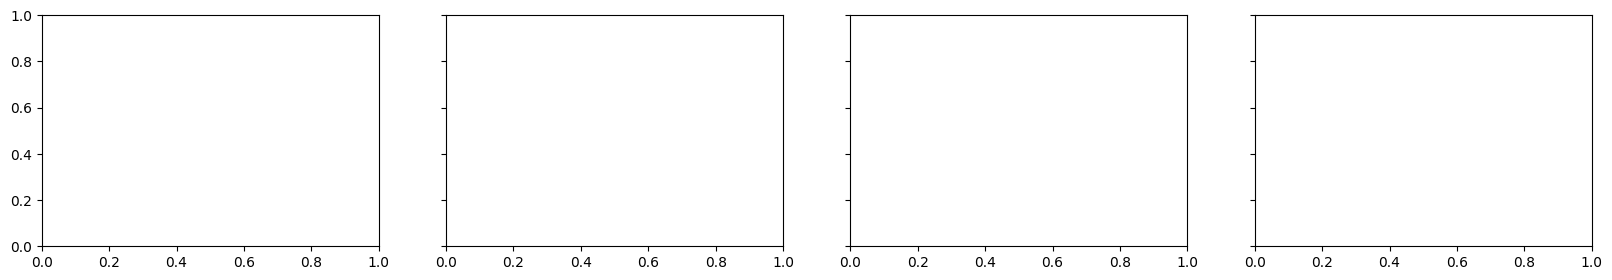

In [3]:
from matplotlib.patches import Rectangle
figure, ax = plt.subplots(1, 4, figsize=(20, 3), sharey=True)

# x_sm = exponential_smoothing(data[:,0], 0.1)
print(np.array(data_cross[:,0]).shape)
cross_filtered_lon = running_mean(data_cross[:,0], 100)
lat_filtered = running_mean(data_cross[:,1], 100)


# Blue zone
# ax[0].plot([0, data[0,3]], [1.5, 1.5], color='green', linewidth=0.5)
# ax[0].plot([0, data[0,3]], [-2., -2.], color='green', linewidth=0.5)
lightgreen = (216/255, 1., 219/255)
lightyellow = (1., 246/255, 183/255)
lightblue = (135/255, 221/255, 255/255)
lighred = (255/255, 198/255, 219/255)
gray = (200/255, 200/255, 200/255)
hatch = '////'
# Longtitudal
ax[0].add_patch(Rectangle((0., -2.), data_cross[0,3], 3.5, fill=True, facecolor=lightblue, hatch=hatch, alpha=0.5, edgecolor=gray, linewidth=0.25))
ax[0].add_patch(Rectangle((0., 1.5), data_cross[0,3], 2, fill=True, facecolor=lightyellow, hatch=hatch, alpha=0.5, edgecolor=gray, linewidth=0.25))
ax[0].add_patch(Rectangle((0., -5), data_cross[0,3], 3, fill=True, facecolor=lightyellow, hatch=hatch, alpha=0.5, edgecolor=gray, linewidth=0.25))
ax[0].add_patch(Rectangle((0., -10), data_cross[0,3], 5, fill=True, facecolor=lighred, hatch=hatch, alpha=0.5, edgecolor=gray, linewidth=0.25))
ax[0].add_patch(Rectangle((0., 3.5), data_cross[0,3], 5, fill=True, facecolor=lighred, hatch=hatch, alpha=0.5, edgecolor=gray, linewidth=0.25))

# Lateral
ax[1].add_patch(Rectangle((0., -4.), data_cross[0,3], 8, fill=True, facecolor=lightblue, hatch=hatch, alpha=0.5, edgecolor=gray, linewidth=0.25))
ax[1].add_patch(Rectangle((0., -5), data_cross[0,3], 1, fill=True, facecolor=lightyellow, hatch=hatch, alpha=0.5, edgecolor=gray, linewidth=0.25))
ax[1].add_patch(Rectangle((0., 4), data_cross[0,3], 1.5, fill=True, facecolor=lightyellow, hatch=hatch, alpha=0.5, edgecolor=gray, linewidth=0.25))
ax[1].add_patch(Rectangle((0., -10), data_cross[0,3], 5, fill=True, facecolor=lighred, hatch=hatch, alpha=0.5, edgecolor=gray, linewidth=0.25))
ax[1].add_patch(Rectangle((0., 5.5), data_cross[0,3], 5, fill=True, facecolor=lighred, hatch=hatch, alpha=0.5, edgecolor=gray, linewidth=0.25))

ax[0].plot(data_cross[:,3]-data_cross[0,3], cross_filtered_lon, 'b')
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Longtitudal acceleration (ms-2)')

ax[1].plot(data_cross[:,3]-data_cross[0,3],lat_filtered, 'b-')
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Lateral acceleration (ms-2)')

ax[0].set_xlim([0,40])
ax[0].set_ylim([-7,7])
ax[1].set_xlim([0,40])
ax[1].set_ylim([-7,7])

jerk_lon = running_mean((cross_filtered_lon[1:] - cross_filtered_lon[:-1])/(data_cross[1:,3]-data_cross[:-1,3]), 8000)


plt.show()

plt.show()

In [251]:
import seaborn as sns
sns.set_style("whitegrid")
import numpy as np
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
from shapely.ops import unary_union
from shapely.validation import make_valid
import geopandas as gpd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]
import dataclasses
from dataclasses import dataclass
import numpy as np
import torch
import torch.nn.functional
import geopandas as gpd
from shapely.geometry.polygon import Polygon, Point
from copy import copy
import time
from math import sqrt
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
from shapely.ops import unary_union
from shapely.validation import make_valid
from shapely.strtree import STRtree
from shapely.ops import triangulate
import geopandas as gpd
import pandas

class PointArraySE2:
    def __init__(self, x, y, theta):
        assert x.shape == y.shape == theta.shape
        self._x = x
        self._y = y
        self._theta = theta

    def as_numpy(self):
        return np.stack([self._x, self._y, self._theta], axis=-1)

    @classmethod
    def from_vec(cls, vec):
        return cls(vec[..., 0], vec[..., 1], vec[..., 2])

    @property
    def theta(self):
        return self._theta

    @property
    def x(self):
        return self._x

    @property
    def y(self):
        return self._y

    def __repr__(self):
        return f"PointArray2D(x={self.x}, y={self.y}, theta={self.theta})"


class RectangleRegionArray:
    def __init__(self, min_x: np.ndarray, max_x: np.ndarray, min_y: np.ndarray, max_y: np.ndarray):
        assert min_x.shape == max_x.shape
        assert min_x.shape == min_y.shape
        assert min_x.shape == max_y.shape
        assert np.all(min_x < max_x)
        assert np.all(min_y < max_y)
        self.min_x = min_x
        self.max_x = max_x
        self.min_y = min_y
        self.max_y = max_y

    def inside(self, positions: PointArraySE2) -> np.ndarray:
        result = self.min_x <= positions.x[:, None]
        result &= positions.x[:, None] <= self.max_x
        result &= self.min_y <= positions.y[:, None]
        result &= positions.y[:, None] <= self.max_y
        return np.any(result, axis=1)

    @classmethod
    def from_dict(cls, data):
        data = np.array(data)
        assert len(data.shape) == 2
        assert data.shape[1] == 4
        return cls(data[:, 0], data[:, 1], data[:, 2], data[:, 3])

    def __len__(self):
        return len(self.min_x)

@dataclass
class PolygonMapBuilder(object):  
    def triangulate(poly: Polygon):
        points = np.vstack((poly.exterior.coords.xy[0], poly.exterior.coords.xy[1])).T
        points = points[0:-1]
        triangles = []
        right = 0
        left = len(points)-1
        pair = 0
        while right < left:
            if pair % 2 == 0:
                tri = Polygon([points[right], points[right+1], points[left]])
                right += 1
            else:
                tri = Polygon([points[left], points[right], points[left-1]])
                left -= 1
            pair += 1 
            triangles.append(make_valid(tri))
        return triangles

    def build(roads: np.ndarray, clip_rect: RectangleRegionArray):       
        j = 0
        for road in roads:
            j += len(road)
        points = np.zeros((int(2*j), 2), dtype=np.float32)
        k = 0
        polygons = gpd.GeoSeries()
        for i in range(len(roads)):
            poly = []
            tmp = k
            for j in range(len(roads[i])):
                x = roads[i][j]["right"][0]
                y = roads[i][j]["right"][1]
                points[k][0] = np.around(x, decimals=1)
                points[k][1] = np.around(y,decimals=1)
                poly.append([points[k][0], points[k][1]])
                k += 1
            tmp = []
            for j in range(len(roads[i])):
                x = roads[i][j]["left"][0]
                y = roads[i][j]["left"][1]
                points[k][0] = np.around(x,decimals=1)
                points[k][1] = np.around(y,decimals=1)
                tmp.append([points[k][0], points[k][1]])
                k += 1
            poly += tmp[::-1]
            poly = make_valid(Polygon(poly))
            list_ = []
            if poly.geom_type == 'MultiPolygon': 
                for geom in poly.geoms:
                    # list_.append(PolygonMapBuilder.triangulate(geom))
                    list_.append(geom)
            elif poly.geom_type == 'Polygon': 
                # list_.append(PolygonMapBuilder.triangulate(poly))
                list_.append(poly)
            for p in list_:
                    polygons = pandas.concat([polygons.geometry, gpd.GeoSeries(p).geometry])
                    if not p.is_valid:
                        raise ValueError("Polygon is not valid")
        polygons = polygons.clip_by_rect(xmin=clip_rect.min_x[0], ymin=clip_rect.min_y[0], xmax=clip_rect.max_x[0], ymax=clip_rect.max_y[0])
        # Get rid of empty polygons beyond the clipping
        polygons =  polygons[~polygons.is_empty]
        # Get rid of invalid shapes such as 'LineString'
        polygons = polygons[polygons.geom_type == 'Polygon']
        tree = STRtree(polygons)
        # polygons = unary_union(polygons)
        return polygons, tree

    def as_numpy(roads: gpd.GeoSeries) -> np.ndarray:
        r = []
        for poly in roads:
            p = []
            for x, y in zip(poly.exterior.coords.xy[0], poly.exterior.coords.xy[1]):
                p.append([x,y])
            r.append(p)
        return np.asarray(r, dtype=object)


In [252]:
from shapely.ops import unary_union
from mpl_toolkits.mplot3d.art3d import Line3DCollection, Patch3DCollection, Poly3DCollection, Patch3D    
from matplotlib.collections import PolyCollection
from shapely.geometry import Polygon, LineString, Point, MultiPolygon

base_path = "C:/Users/user/Documents/pytorch-motion-planner"
roads=np.load(f"{base_path}/beamng/roads.npy", allow_pickle=True)   
# clip_rect = RectangleRegionArray.from_dict([[-745, -435, 440, 750]])
clip_rect = RectangleRegionArray.from_dict([[-700, -300, 50, 400]])
# clip_rect = RectangleRegionArray.from_dict([[-400, -100, 450, 750]])
polygons, tree = PolygonMapBuilder.build(roads, clip_rect)

# xmin = -735
# xmax = -435
# ymin = 440
# ymax = 750

xmin = -600
xmax = -400
ymin = 120
ymax = 320
# xmin = -700
# xmax = -300
# ymin = 50
# ymax = 400

# xmin = -400
# xmax = -100
# ymin = 450
# ymax = 750

polygons = unary_union(polygons)
rect = Polygon([[xmin, ymin], [xmax, ymin], [xmax, ymax], [xmin, ymax]])
polygons = rect.difference(polygons)
if (isinstance(polygons, Polygon)):
    polygons = MultiPolygon([polygons])

polys_ext = [elem for elem in [list(x.exterior.coords) for x in polygons.geoms]]
polys_int = [elem for elem in [list([i.coords for i in x.interiors]) for x in polygons.geoms]]


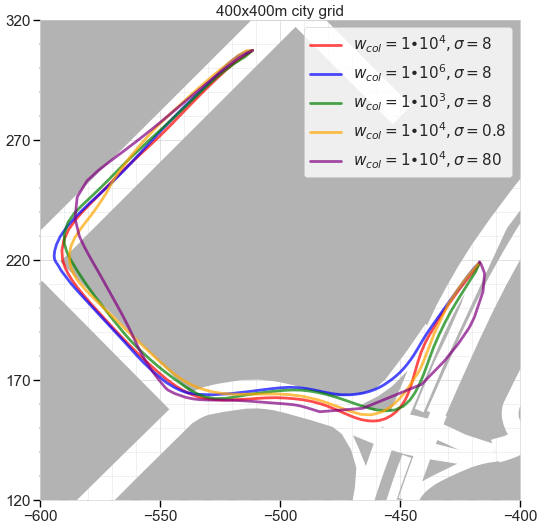

In [253]:
import matplotlib as mpl
pc = []
for line in polys_ext:
    line = np.array([[p[0], p[1]] for p in line])
    pc.append(PolyCollection(np.expand_dims(line, axis=0), facecolors=(0.7,0.7,0.7,1.), edgecolors="black", linewidths=0.0))

for poly in polys_int:
    for line in poly:
        line = np.array([[p[0], p[1]] for p in line])
        pc.append(PolyCollection(np.expand_dims(line, axis=0), facecolors=(1.,1.,1.,1.), edgecolors="black", linewidths=0.0))
fig_3d = plt.figure(dpi=50)
fig_3d.add_axes([0.02, 0.02, 0.96, 0.96])
plt.gca().set_aspect("equal")
ax_3d = fig_3d.axes[0]
ax_3d.set_xlim(xmin, xmax)
ax_3d.set_ylim(ymin, ymax)

ax_3d.set_xticks(range(xmin,xmax+50,50))
ax_3d.set_xticks(range(xmin,xmax,10), minor=True)
ax_3d.set_yticks(range(ymin,ymax+50,50))
ax_3d.set_yticks(range(ymin,ymax,10), minor=True)
ax_3d.tick_params(axis='x', which='major', labelsize=22, color='black', width=2.0, length=10.0)
ax_3d.tick_params(axis='y', which='major', labelsize=22, color='black', width=2.0, length=10.0)
ax_3d.xaxis.set_ticks_position('bottom')
ax_3d.yaxis.set_ticks_position('left')
[ax_3d.add_collection(polyline) for polyline in pc]

##############

points = np.load("../dumps/hotel/sensivity_exp/trajectory_1679328263.37139.npy")
trajectory_w_col_5e4_sigma_8 = ax_3d.plot(points[:,1],points[:,2], color="red", linewidth=4.0, alpha=0.7)
# ax_3d.scatter(points[:,1],points[:,2], edgecolors='black', linewidths=1.5, alpha=0.8, color="red")
trajectory_w_col_5e4_sigma_8[0].set_label("${{{}}}w_{{{col}}} = 1•{{{}}}10^{{{4}}}, \sigma = 8$")

points = np.load("../dumps/hotel/sensivity_exp/trajectory_1679332536.2095778.npy")
trajectory_w_col_5e6_sigma_8 = ax_3d.plot(points[:,1],points[:,2], color="blue", linewidth=4.0, alpha=0.7)
# ax_3d.scatter(points[:,1],points[:,2], edgecolors='black', linewidths=1.5, alpha=0.8, color='blue')
trajectory_w_col_5e6_sigma_8[0].set_label("${{{}}}w_{{{col}}} = 1•{{{}}}10^{{{6}}}, \sigma = 8$")

points = np.load("../dumps/hotel/sensivity_exp/trajectory_1679332768.5054743.npy")
trajectory_w_col_5e3_sigma_8 = ax_3d.plot(points[:,1],points[:,2], color="green", linewidth=4.0, alpha=0.7)
# ax_3d.scatter(points[:,1],points[:,2], edgecolors='black', linewidths=1.5, alpha=0.8, color='green')
trajectory_w_col_5e3_sigma_8[0].set_label("${{{}}}w_{{{col}}} = 1•{{{}}}10^{{{3}}}, \sigma = 8$")

###

points = np.load("../dumps/hotel/sensivity_exp/trajectory_1679333688.3920958.npy")
trajectory_w_col_5e4_sigma_0_8 = ax_3d.plot(points[:,1],points[:,2], color="orange", linewidth=4.0, alpha=0.7)
# ax_3d.scatter(points[:,1],points[:,2], edgecolors='black', linewidths=1.5, alpha=0.8, color='orange')
trajectory_w_col_5e4_sigma_0_8[0].set_label("${{{}}}w_{{{col}}} = 1•{{{}}}10^{{{4}}}, \sigma = 0.8$")

points = np.load("../dumps/hotel/sensivity_exp/trajectory_1679333859.5203252.npy")
trajectory_w_col_5e4_sigma_80 = ax_3d.plot(points[:,1],points[:,2], color="purple", linewidth=4.0, alpha=0.7)
# ax_3d.scatter(points[:,1],points[:,2], edgecolors='black', linewidths=1.5, alpha=0.8, color='purple')
trajectory_w_col_5e4_sigma_80[0].set_label("${{{}}}w_{{{col}}} = 1•{{{}}}10^{{{4}}}, \sigma = 80$")

plt.title("400x400m city grid", fontsize = 22)
plt.legend(fontsize=22)
ax_3d.grid(which='minor', alpha=0.5)
ax_3d.grid(which='major', alpha=1.0)
plt.show()

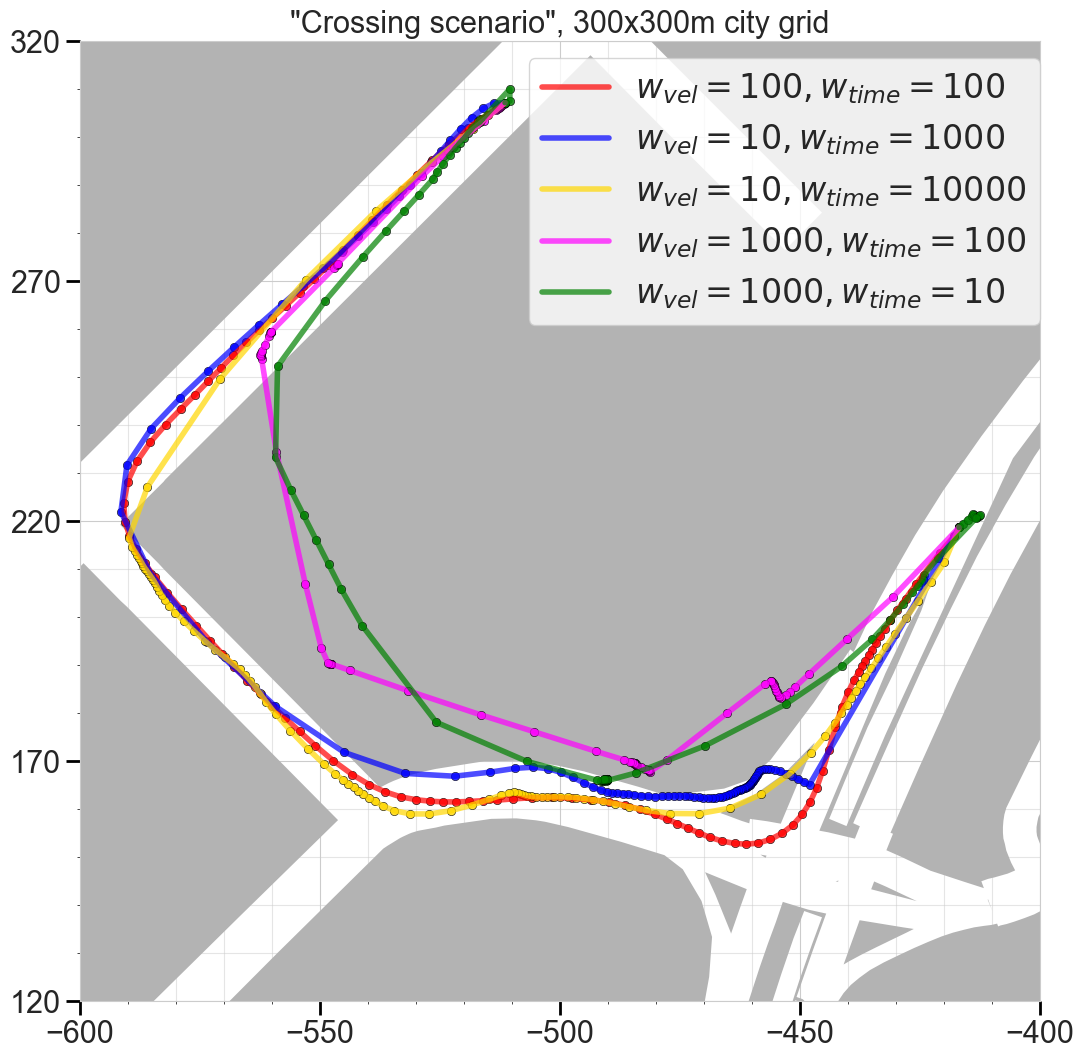

In [272]:
import matplotlib as mpl
pc = []
for line in polys_ext:
    line = np.array([[p[0], p[1]] for p in line])
    pc.append(PolyCollection(np.expand_dims(line, axis=0), facecolors=(0.7,0.7,0.7,1.), edgecolors="black", linewidths=0.0))

for poly in polys_int:
    for line in poly:
        line = np.array([[p[0], p[1]] for p in line])
        pc.append(PolyCollection(np.expand_dims(line, axis=0), facecolors=(1.,1.,1.,1.), edgecolors="black", linewidths=0.0))
fig_3d = plt.figure(figsize=(10,10))
fig_3d.add_axes([0.02, 0.02, 0.96, 0.96])
plt.gca().set_aspect("equal")
ax_3d = fig_3d.axes[0]
ax_3d.set_xlim(xmin, xmax)
ax_3d.set_ylim(ymin, ymax)
ax_3d.set_xticks(range(xmin,xmax+50,50))
ax_3d.set_xticks(range(xmin,xmax,10), minor=True)
ax_3d.set_yticks(range(ymin,ymax+50,50))
ax_3d.set_yticks(range(ymin,ymax,10), minor=True)
ax_3d.tick_params(axis='x', which='major', labelsize=22, color='black', width=2.0, length=10.0)
ax_3d.tick_params(axis='y', which='major', labelsize=22, color='black', width=2.0, length=10.0)
ax_3d.xaxis.set_ticks_position('bottom')
ax_3d.yaxis.set_ticks_position('left')
[ax_3d.add_collection(polyline) for polyline in pc]

##############

points = np.load("../dumps/hotel/sensivity_exp/trajectory_1679328263.37139.npy")
trajectory_w_vel_1e2_w_time_1e2 = ax_3d.plot(points[:,1],points[:,2], color="red", linewidth=4.0, alpha=0.7)
ax_3d.scatter(points[:,1],points[:,2], edgecolors='black', linewidths=0.5, alpha=0.8, color="red")
trajectory_w_vel_1e2_w_time_1e2[0].set_label("${{{}}}w_{{{vel}}} = 100, {{{}}}w_{{{time}}} = 100$")


points = np.load("../dumps/hotel/sensivity_exp/trajectory_1679334367.3058467.npy")
trajectory_w_vel_1e1_w_time_1e3 = ax_3d.plot(points[:,1],points[:,2], color="blue", linewidth=4.0, alpha=0.7)
ax_3d.scatter(points[:,1],points[:,2], edgecolors='black', linewidths=0.5, alpha=0.8, color="blue")
trajectory_w_vel_1e1_w_time_1e3[0].set_label("${{{}}}w_{{{vel}}} = 10, {{{}}}w_{{{time}}} = 1000$")

points = np.load("../dumps/hotel/sensivity_exp/trajectory_1679334629.9555573.npy")
trajectory_w_vel_1e1_w_time_1e4 = ax_3d.plot(points[:,1],points[:,2], color="gold", linewidth=4.0, alpha=0.7)
ax_3d.scatter(points[:,1],points[:,2], edgecolors='black', linewidths=0.5, alpha=0.8, color="gold")
trajectory_w_vel_1e1_w_time_1e4[0].set_label("${{{}}}w_{{{vel}}} = 10, {{{}}}w_{{{time}}} = 10000$")

points = np.load("../dumps/hotel/sensivity_exp/trajectory_1679335463.7670445.npy")
trajectory_w_vel_1e3_w_time_1e2 = ax_3d.plot(points[:,1],points[:,2], color="magenta", linewidth=4.0, alpha=0.7)
ax_3d.scatter(points[:,1],points[:,2], edgecolors='black', linewidths=0.5, alpha=0.8, color="magenta")
trajectory_w_vel_1e3_w_time_1e2[0].set_label("${{{}}}w_{{{vel}}} = 1000, {{{}}}w_{{{time}}} = 100$")

points = np.load("../dumps/hotel/sensivity_exp/trajectory_1679334802.557597.npy")
trajectory_w_vel_1e3_w_time_1e1 = ax_3d.plot(points[:,1],points[:,2], color="green", linewidth=4.0, alpha=0.7)
ax_3d.scatter(points[:,1],points[:,2], edgecolors='black', linewidths=0.5, alpha=0.8, color="green")
trajectory_w_vel_1e3_w_time_1e1[0].set_label("${{{}}}w_{{{vel}}} = 1000, {{{}}}w_{{{time}}} = 10$")

plt.title("\"Crossing scenario\", 300x300m city grid", fontsize = 22)
plt.legend(fontsize=24, bbox_to_anchor=(0.45,1.0))
ax_3d.grid(which='minor', alpha=0.5)
ax_3d.grid(which='major', alpha=1.0)
plt.show()

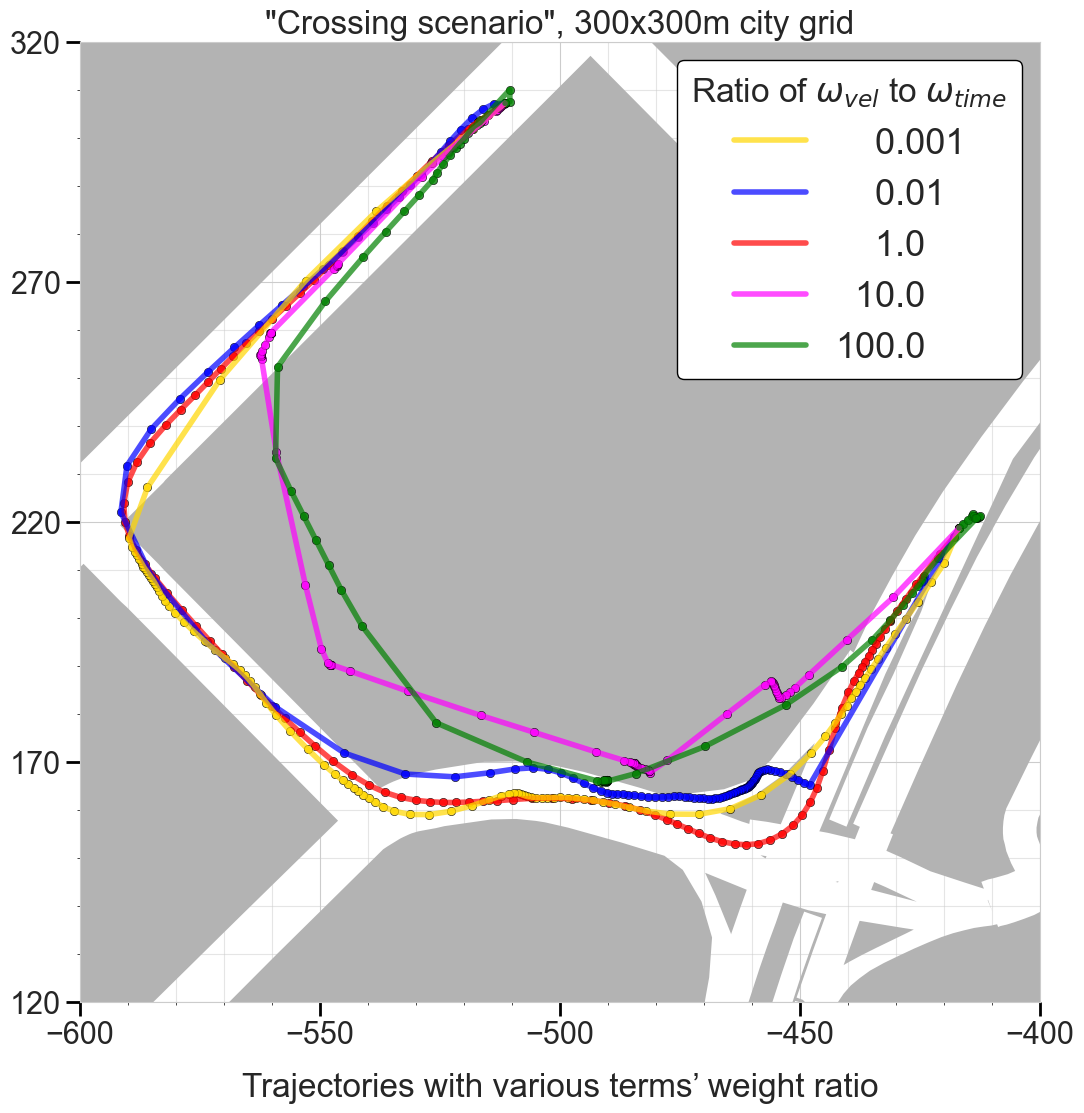

In [307]:
import matplotlib as mpl
pc = []
for line in polys_ext:
    line = np.array([[p[0], p[1]] for p in line])
    pc.append(PolyCollection(np.expand_dims(line, axis=0), facecolors=(0.7,0.7,0.7,1.), edgecolors="black", linewidths=0.0))

for poly in polys_int:
    for line in poly:
        line = np.array([[p[0], p[1]] for p in line])
        pc.append(PolyCollection(np.expand_dims(line, axis=0), facecolors=(1.,1.,1.,1.), edgecolors="black", linewidths=0.0))
fig_3d = plt.figure(figsize=(10,10))
fig_3d.add_axes([0.02, 0.02, 0.96, 0.96])
plt.gca().set_aspect("equal")
ax_3d = fig_3d.axes[0]
ax_3d.set_xlim(xmin, xmax)
ax_3d.set_ylim(ymin, ymax)
ax_3d.set_xticks(range(xmin,xmax+50,50))
ax_3d.set_xticks(range(xmin,xmax,10), minor=True)
ax_3d.set_yticks(range(ymin,ymax+50,50))
ax_3d.set_yticks(range(ymin,ymax,10), minor=True)
ax_3d.tick_params(axis='x', which='major', labelsize=22, color='black', width=2.0, length=10.0)
ax_3d.tick_params(axis='y', which='major', labelsize=22, color='black', width=2.0, length=10.0)
ax_3d.xaxis.set_ticks_position('bottom')
ax_3d.yaxis.set_ticks_position('left')
[ax_3d.add_collection(polyline) for polyline in pc]

##############

points = np.load("../dumps/hotel/sensivity_exp/trajectory_1679328263.37139.npy")
trajectory_w_vel_1e2_w_time_1e2 = ax_3d.plot(points[:,1],points[:,2], color="red", linewidth=4.0, alpha=0.7)
ax_3d.scatter(points[:,1],points[:,2], edgecolors='black', linewidths=0.5, alpha=0.8, color="red")
# trajectory_w_vel_1e2_w_time_1e2[0].set_label("${{{}}}w_{{{vel}}} = 100, {{{}}}w_{{{time}}} = 100$")
trajectory_w_vel_1e2_w_time_1e2[0].set_label(f"{1.0:7.1f}")


points = np.load("../dumps/hotel/sensivity_exp/trajectory_1679334367.3058467.npy")
trajectory_w_vel_1e1_w_time_1e3 = ax_3d.plot(points[:,1],points[:,2], color="blue", linewidth=4.0, alpha=0.7)
ax_3d.scatter(points[:,1],points[:,2], edgecolors='black', linewidths=0.5, alpha=0.8, color="blue")
trajectory_w_vel_1e1_w_time_1e3[0].set_label(f"{0.01:8.2f}")

points = np.load("../dumps/hotel/sensivity_exp/trajectory_1679334629.9555573.npy")
trajectory_w_vel_1e1_w_time_1e4 = ax_3d.plot(points[:,1],points[:,2], color="gold", linewidth=4.0, alpha=0.7)
ax_3d.scatter(points[:,1],points[:,2], edgecolors='black', linewidths=0.5, alpha=0.8, color="gold")
trajectory_w_vel_1e1_w_time_1e4[0].set_label(f"{0.001:9.3f}")

points = np.load("../dumps/hotel/sensivity_exp/trajectory_1679335463.7670445.npy")
trajectory_w_vel_1e3_w_time_1e2 = ax_3d.plot(points[:,1],points[:,2], color="magenta", linewidth=4.0, alpha=0.7)
ax_3d.scatter(points[:,1],points[:,2], edgecolors='black', linewidths=0.5, alpha=0.8, color="magenta")
trajectory_w_vel_1e3_w_time_1e2[0].set_label(f"{10.0:6.1f}")

points = np.load("../dumps/hotel/sensivity_exp/trajectory_1679334802.557597.npy")
trajectory_w_vel_1e3_w_time_1e1 = ax_3d.plot(points[:,1],points[:,2], color="green", linewidth=4.0, alpha=0.7)
ax_3d.scatter(points[:,1],points[:,2], edgecolors='black', linewidths=0.5, alpha=0.8, color="green")
trajectory_w_vel_1e3_w_time_1e1[0].set_label(f"{100.0:4.1f}")

txsize = 24
plt.title("\"Crossing scenario\", 300x300m city grid", fontsize = txsize)
plt.suptitle("Trajectories with various terms’ weight ratio", fontsize = txsize, y=-0.05)

order = [2,1,0,3,4]
handles, labels = plt.gca().get_legend_handles_labels()

leg = ax_3d.legend([handles[idx] for idx in order] ,[labels[idx] for idx in order], framealpha=1.0, bbox_to_anchor=(1.0,1.0), edgecolor=(0.0, 0.0, 0.0), fontsize=26)
leg.set_title('Ratio of ${{{}}}\omega_{{{vel}}}$ to ${{{}}}\omega_{{{time}}}$',prop={'size':24})

ax_3d.grid(which='minor', alpha=0.5)
ax_3d.grid(which='major', alpha=1.0)

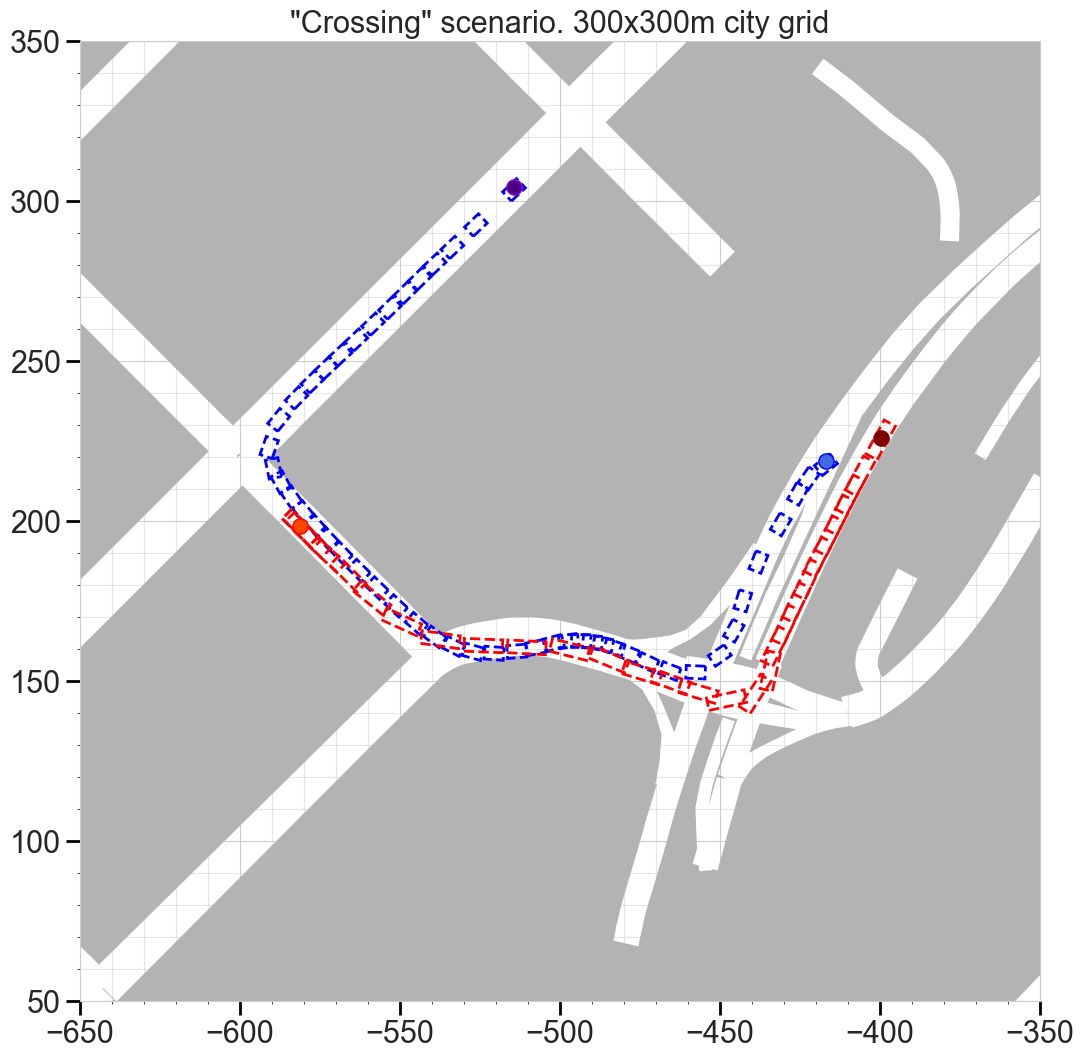

In [15]:
from shapely.ops import unary_union
from mpl_toolkits.mplot3d.art3d import Line3DCollection, Patch3DCollection, Poly3DCollection, Patch3D    
from matplotlib.collections import PolyCollection
from shapely.geometry import Polygon, LineString, Point, MultiPolygon
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch, Rectangle
from math import pi, atan2
from matplotlib.transforms import Affine2D

def plot_rectangle(ax, x, y, length=5, width=3, angle=0, edgecolor='black', linewidth=1, rounded_corners=0.1, label=None, zorder=None):
    rect = Rectangle((x-length/2, y-length/2), length, width, angle=angle*180/pi, rotation_point='center', fill=False, edgecolor=edgecolor, linewidth=2, linestyle="dashed", label=label, zorder=None)
    ax.add_patch(rect)

dummy_data = create_dummy_path(dummy_script_hotel)
# Cross
xmin = -650
xmax = -350
ymin = 50
ymax = 350


base_path = "C:/Users/user/Documents/pytorch-motion-planner"
roads=np.load(f"{base_path}/beamng/roads.npy", allow_pickle=True)   
clip_rect = RectangleRegionArray.from_dict([[xmin, xmax, ymin, ymax]])
polygons, tree = PolygonMapBuilder.build(roads, clip_rect)
textsize=22


polygons = unary_union(polygons)
rect = Polygon([[xmin, ymin], [xmax, ymin], [xmax, ymax], [xmin, ymax]])
polygons = rect.difference(polygons)
if (isinstance(polygons, Polygon)):
    polygons = MultiPolygon([polygons])

polys_ext = [elem for elem in [list(x.exterior.coords) for x in polygons.geoms]]
polys_int = [elem for elem in [list([i.coords for i in x.interiors]) for x in polygons.geoms]]
import matplotlib as mpl
pc = []
for line in polys_ext:
    line = np.array([[p[0], p[1]] for p in line])
    pc.append(PolyCollection(np.expand_dims(line, axis=0), facecolors=(0.7,0.7,0.7,1.), edgecolors="black", linewidths=0.0))

for poly in polys_int:
    for line in poly:
        line = np.array([[p[0], p[1]] for p in line])
        pc.append(PolyCollection(np.expand_dims(line, axis=0), facecolors=(1.,1.,1.,1.), edgecolors="black", linewidths=0.0))
fig = plt.figure(figsize=(10,10))
fig.add_axes([0.02, 0.02, 0.96, 0.96])
plt.gca().set_aspect("equal")
ax = fig.axes[0]
ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)

ax.set_xticks(range(xmin,xmax+50,50))
ax.set_xticks(range(xmin,xmax,10), minor=True)
ax.set_yticks(range(ymin,ymax+50,50))
ax.set_yticks(range(ymin,ymax,10), minor=True)
ax.tick_params(axis='x', which='major', labelsize=textsize, color='black', width=2.0, length=10.0)
ax.tick_params(axis='y', which='major', labelsize=textsize, color='black', width=2.0, length=10.0)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
[ax.add_collection(polyline) for polyline in pc]

##############

ego_points = (np.load("../dumps/hotel/trajectory_1681053815.723378.npy"))[::2]
obs_points = np.array(dummy_data)+3

for i in range(len(ego_points)-2):
    dir = (ego_points[i+1][1] - ego_points[i][1], ego_points[i+1][2] - ego_points[i][2])
    angle = atan2(dir[1], dir[0])
    plot_rectangle(ax, x=ego_points[i][1], y=ego_points[i][2], angle=angle, edgecolor='blue', length=6, width=4)
plot_rectangle(ax, x=ego_points[-1][1], y=ego_points[-1][2], angle=angle, edgecolor='blue', length=6, width=4, label = "Ego vehicle", zorder=1000)

for i in range(len(obs_points)-2):
    dir = (obs_points[i+1][1] - obs_points[i][1], obs_points[i+1][2] - obs_points[i][2])
    angle = atan2(dir[1], dir[0])
    plot_rectangle(ax, x=obs_points[i][1], y=obs_points[i][2], angle=angle, edgecolor='red', length=12, width=4)
plot_rectangle(ax, x=obs_points[-1][1], y=obs_points[-1][2], angle=angle, edgecolor='red', length=12, width=4, label = "Obstacle vehicle")

psize=120
ax.scatter([ego_points[0][1]], [ego_points[0][2]], label="Start", s=psize, edgecolor='b', facecolor='royalblue')
ax.scatter([ego_points[-1][1]], [ego_points[-1][2]], label="Goal", s=psize, edgecolor='darkviolet', facecolor='indigo')

ax.scatter([obs_points[0][1]], [obs_points[0][2]-3.5], label="Start", s=psize, edgecolor='r', facecolor='orangered')
ax.scatter([obs_points[-1][1]-0], [obs_points[-1][2]-3.5], label="Goal", s=psize, edgecolor='darkred', facecolor='maroon')


plt.title("\"Crossing\" scenario. 300x300m city grid", fontsize = textsize)

ax.grid(which='minor', alpha=0.5)
ax.grid(which='major', alpha=1.0)


plt.show()

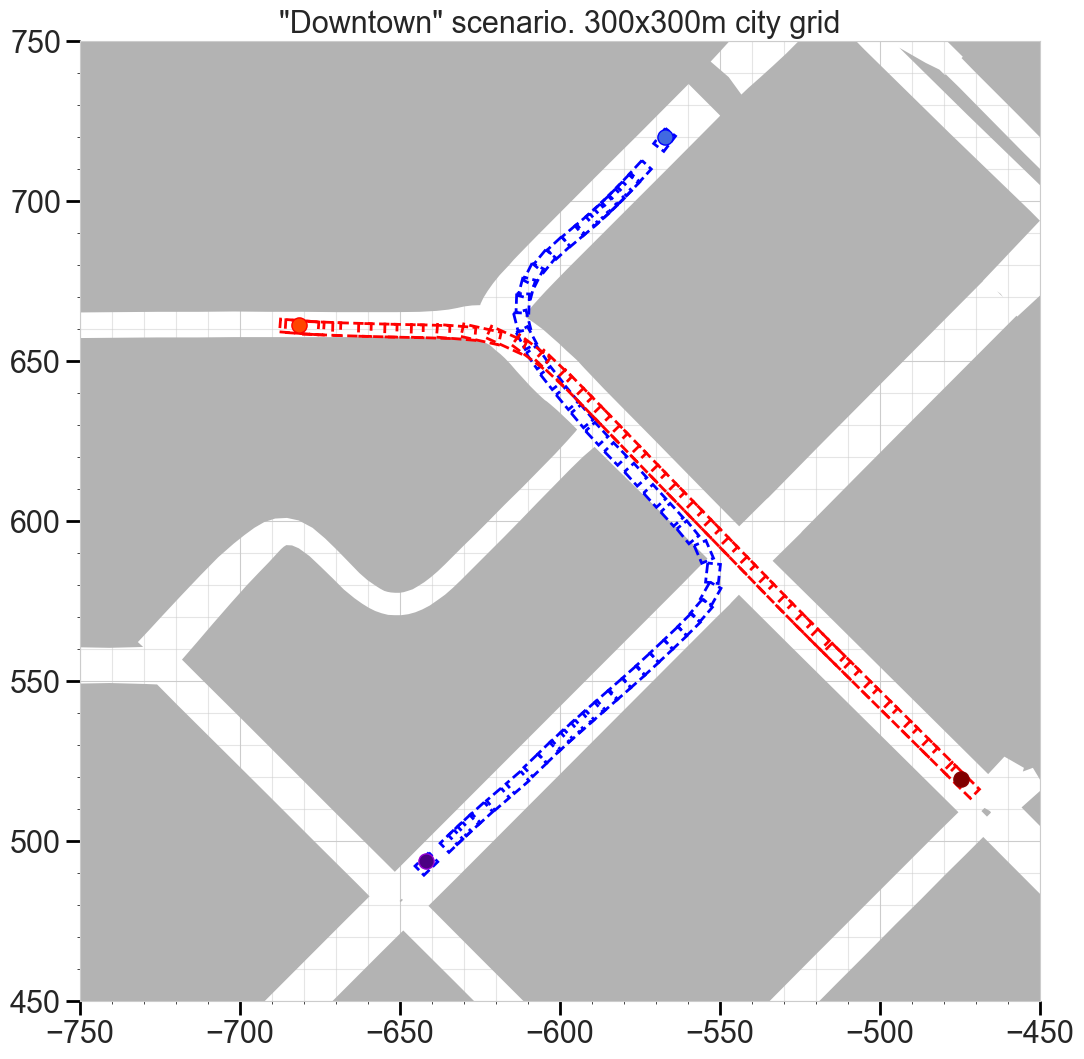

In [16]:
from shapely.ops import unary_union
from mpl_toolkits.mplot3d.art3d import Line3DCollection, Patch3DCollection, Poly3DCollection, Patch3D    
from matplotlib.collections import PolyCollection
from shapely.geometry import Polygon, LineString, Point, MultiPolygon
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch, Rectangle
from math import pi, atan2
from matplotlib.transforms import Affine2D

def plot_rectangle(ax, x, y, length=5, width=3, angle=0, edgecolor='black', linewidth=1, rounded_corners=0.1, label=None, zorder=None):
    rect = Rectangle((x-length/2, y-length/2), length, width, angle=angle*180/pi, rotation_point='center', fill=False, edgecolor=edgecolor, linewidth=2, linestyle="dashed", label=label, zorder=None)
    ax.add_patch(rect)

# Downtown
xmin = -750
xmax = -450
ymin = 450
ymax = 750

dummy_data = create_dummy_path(dummy_script_cross1)

base_path = "C:/Users/user/Documents/pytorch-motion-planner"
roads=np.load(f"{base_path}/beamng/roads.npy", allow_pickle=True)   
clip_rect = RectangleRegionArray.from_dict([[xmin, xmax, ymin, ymax]])
polygons, tree = PolygonMapBuilder.build(roads, clip_rect)
textsize=22


polygons = unary_union(polygons)
rect = Polygon([[xmin, ymin], [xmax, ymin], [xmax, ymax], [xmin, ymax]])
polygons = rect.difference(polygons)
if (isinstance(polygons, Polygon)):
    polygons = MultiPolygon([polygons])

polys_ext = [elem for elem in [list(x.exterior.coords) for x in polygons.geoms]]
polys_int = [elem for elem in [list([i.coords for i in x.interiors]) for x in polygons.geoms]]
import matplotlib as mpl
pc = []
for line in polys_ext:
    line = np.array([[p[0], p[1]] for p in line])
    pc.append(PolyCollection(np.expand_dims(line, axis=0), facecolors=(0.7,0.7,0.7,1.), edgecolors="black", linewidths=0.0))

for poly in polys_int:
    for line in poly:
        line = np.array([[p[0], p[1]] for p in line])
        pc.append(PolyCollection(np.expand_dims(line, axis=0), facecolors=(1.,1.,1.,1.), edgecolors="black", linewidths=0.0))
fig = plt.figure(figsize=(10,10))
fig.add_axes([0.02, 0.02, 0.96, 0.96])
plt.gca().set_aspect("equal")
ax = fig.axes[0]
ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)

ax.set_xticks(range(xmin,xmax+50,50))
ax.set_xticks(range(xmin,xmax,10), minor=True)
ax.set_yticks(range(ymin,ymax+50,50))
ax.set_yticks(range(ymin,ymax,10), minor=True)
ax.tick_params(axis='x', which='major', labelsize=textsize, color='black', width=2.0, length=10.0)
ax.tick_params(axis='y', which='major', labelsize=textsize, color='black', width=2.0, length=10.0)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
[ax.add_collection(polyline) for polyline in pc]

##############

ego_points = (np.load("../dumps/cross_1/exp001/trajectory_1679439733.8771145.npy"))[::2]
obs_points = (np.array(dummy_data)+3)[:-25]

for i in range(len(ego_points)-2):
    dir = (ego_points[i+1][1] - ego_points[i][1], ego_points[i+1][2] - ego_points[i][2])
    angle = atan2(dir[1], dir[0])
    plot_rectangle(ax, x=ego_points[i][1], y=ego_points[i][2], angle=angle, edgecolor='blue', length=6, width=4)
plot_rectangle(ax, x=ego_points[-1][1], y=ego_points[-1][2], angle=angle, edgecolor='blue', length=6, width=4, label = "Ego vehicle", zorder=1000)

for i in range(len(obs_points)-2):
    dir = (obs_points[i+1][1] - obs_points[i][1], obs_points[i+1][2] - obs_points[i][2])
    angle = atan2(dir[1], dir[0])
    plot_rectangle(ax, x=obs_points[i][1], y=obs_points[i][2], angle=angle, edgecolor='red', length=12, width=4)
plot_rectangle(ax, x=obs_points[-1][1], y=obs_points[-1][2], angle=angle, edgecolor='red', length=12, width=4, label = "Obstacle vehicle")

psize=120
ax.scatter([ego_points[0][1]], [ego_points[0][2]], label="Start", s=psize, edgecolor='b', facecolor='royalblue')
ax.scatter([ego_points[-1][1]], [ego_points[-1][2]], label="Goal", s=psize, edgecolor='darkviolet', facecolor='indigo')

ax.scatter([obs_points[0][1]], [obs_points[0][2]-3.5], label="Start", s=psize, edgecolor='r', facecolor='orangered')
ax.scatter([obs_points[-1][1]-0], [obs_points[-1][2]-3.5], label="Goal", s=psize, edgecolor='darkred', facecolor='maroon')


plt.title("\"Downtown\" scenario. 300x300m city grid", fontsize = textsize)
ax.grid(which='minor', alpha=0.5)
ax.grid(which='major', alpha=1.0)


plt.show()

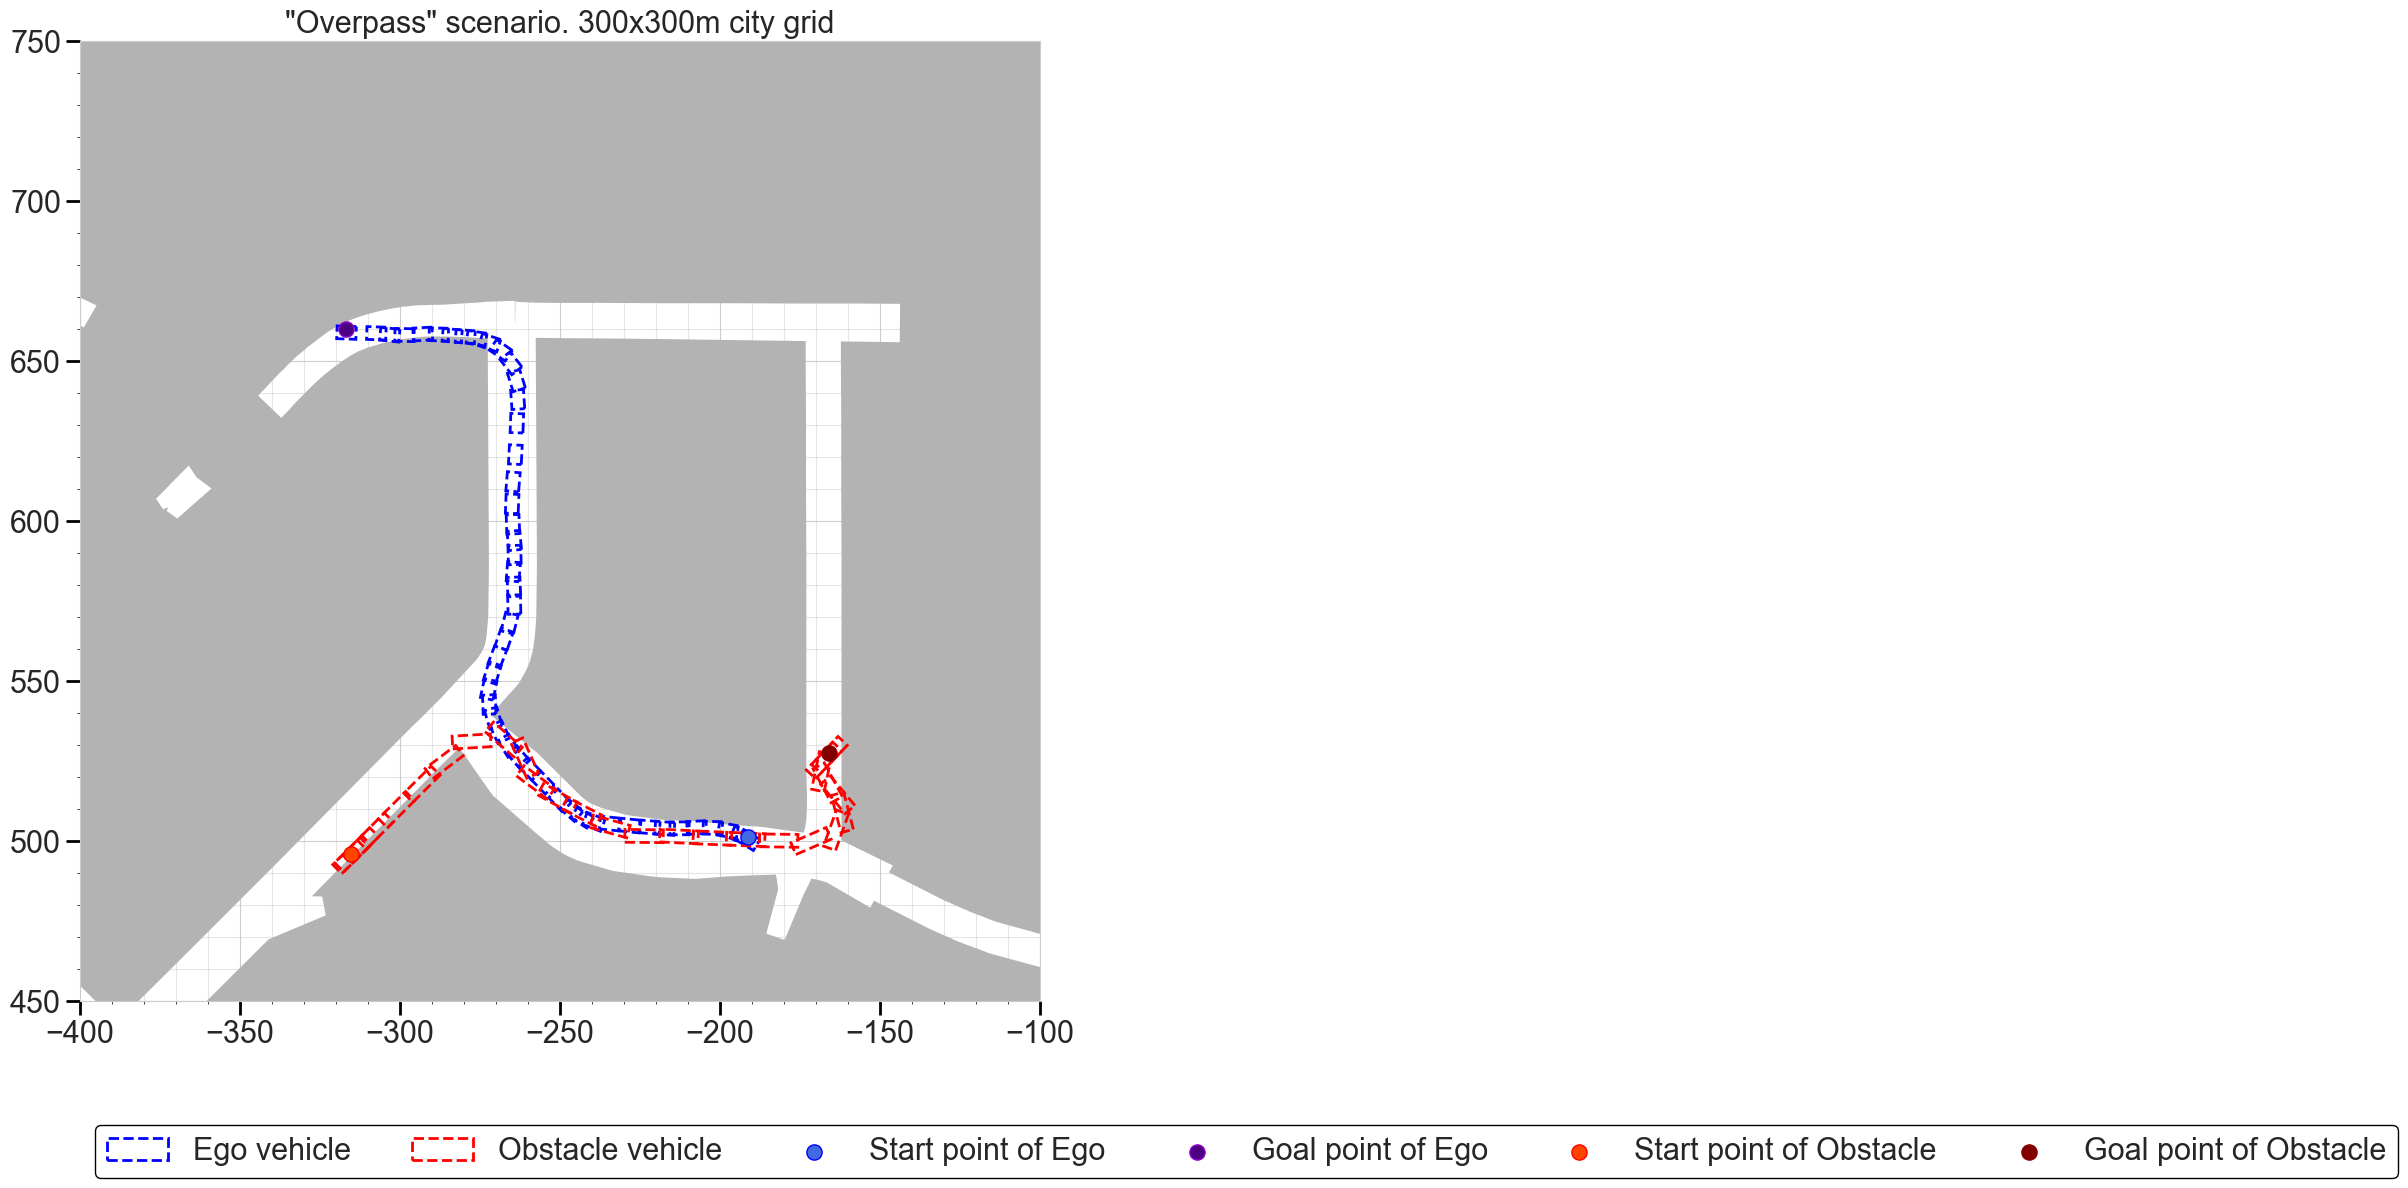

In [17]:
from shapely.ops import unary_union
from mpl_toolkits.mplot3d.art3d import Line3DCollection, Patch3DCollection, Poly3DCollection, Patch3D    
from matplotlib.collections import PolyCollection
from shapely.geometry import Polygon, LineString, Point, MultiPolygon
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch, Rectangle
from math import pi, atan2
from matplotlib.transforms import Affine2D

def plot_rectangle(ax, x, y, length=5, width=3, angle=0, edgecolor='black', linewidth=1, rounded_corners=0.1, label=None, zorder=None):
    rect = Rectangle((x-length/2, y-length/2), length, width, angle=angle*180/pi, rotation_point='center', fill=False, edgecolor=edgecolor, linewidth=2, linestyle="dashed", label=label, zorder=None)
    ax.add_patch(rect)

# Harbor/Overpass
xmin = -400
xmax = -100
ymin = 450
ymax = 750

dummy_data = create_dummy_path(dummy_script_harbor)

base_path = "C:/Users/user/Documents/pytorch-motion-planner"
roads=np.load(f"{base_path}/beamng/roads.npy", allow_pickle=True)   
clip_rect = RectangleRegionArray.from_dict([[xmin, xmax, ymin, ymax]])
polygons, tree = PolygonMapBuilder.build(roads, clip_rect)
textsize=22


polygons = unary_union(polygons)
rect = Polygon([[xmin, ymin], [xmax, ymin], [xmax, ymax], [xmin, ymax]])
polygons = rect.difference(polygons)
if (isinstance(polygons, Polygon)):
    polygons = MultiPolygon([polygons])

polys_ext = [elem for elem in [list(x.exterior.coords) for x in polygons.geoms]]
polys_int = [elem for elem in [list([i.coords for i in x.interiors]) for x in polygons.geoms]]
import matplotlib as mpl
pc = []
for line in polys_ext:
    line = np.array([[p[0], p[1]] for p in line])
    pc.append(PolyCollection(np.expand_dims(line, axis=0), facecolors=(0.7,0.7,0.7,1.), edgecolors="black", linewidths=0.0))

for poly in polys_int:
    for line in poly:
        line = np.array([[p[0], p[1]] for p in line])
        pc.append(PolyCollection(np.expand_dims(line, axis=0), facecolors=(1.,1.,1.,1.), edgecolors="black", linewidths=0.0))
fig = plt.figure(figsize=(10,10))
fig.add_axes([0.02, 0.02, 0.96, 0.96])
plt.gca().set_aspect("equal")
ax = fig.axes[0]
ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)

ax.set_xticks(range(xmin,xmax+50,50))
ax.set_xticks(range(xmin,xmax,10), minor=True)
ax.set_yticks(range(ymin,ymax+50,50))
ax.set_yticks(range(ymin,ymax,10), minor=True)
ax.tick_params(axis='x', which='major', labelsize=textsize, color='black', width=2.0, length=10.0)
ax.tick_params(axis='y', which='major', labelsize=textsize, color='black', width=2.0, length=10.0)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
[ax.add_collection(polyline) for polyline in pc]

##############

ego_points = (np.load("../dumps/harbor/trajectory_1681058374.9340937.npy"))[::2]
obs_points = (np.array(dummy_data)+3)[2:]

for i in range(len(ego_points)-2):
    dir = (ego_points[i+1][1] - ego_points[i][1], ego_points[i+1][2] - ego_points[i][2])
    angle = atan2(dir[1], dir[0])
    plot_rectangle(ax, x=ego_points[i][1], y=ego_points[i][2], angle=angle, edgecolor='blue', length=6, width=4)
plot_rectangle(ax, x=ego_points[-1][1], y=ego_points[-1][2], angle=angle, edgecolor='blue', length=6, width=4, label = "Ego vehicle", zorder=1000)

for i in range(len(obs_points)-2):
    dir = (obs_points[i+1][1] - obs_points[i][1], obs_points[i+1][2] - obs_points[i][2])
    angle = atan2(dir[1], dir[0])
    plot_rectangle(ax, x=obs_points[i][1], y=obs_points[i][2], angle=angle, edgecolor='red', length=12, width=4)
plot_rectangle(ax, x=obs_points[-1][1], y=obs_points[-1][2], angle=angle, edgecolor='red', length=12, width=4, label = "Obstacle vehicle")

psize=120
ax.scatter([ego_points[0][1]], [ego_points[0][2]], label="Start point of Ego", s=psize, edgecolor='b', facecolor='royalblue')
ax.scatter([ego_points[-1][1]], [ego_points[-1][2]], label="Goal point of Ego", s=psize, edgecolor='darkviolet', facecolor='indigo')

ax.scatter([obs_points[0][1]], [obs_points[0][2]-3.5], label="Start point of Obstacle", s=psize, edgecolor='r', facecolor='orangered')
ax.scatter([obs_points[-1][1]-0], [obs_points[-1][2]-3.5], label="Goal point of Obstacle", s=psize, edgecolor='darkred', facecolor='maroon')


plt.title("\"Overpass\" scenario. 300x300m city grid", fontsize = textsize)
plt.legend(loc='lower left', bbox_to_anchor=(0.0, -0.2), ncols=6, framealpha=1.0, edgecolor=(0.0, 0.0, 0.0), fontsize=textsize)
ax.grid(which='minor', alpha=0.5)
ax.grid(which='major', alpha=1.0)


plt.show()

In [5]:
def exponential_smoothing(data, alpha):
    n = data.shape[0]
    exp_smooth_data = np.zeros_like(data)
    exp_smooth_data[0] = data[0]
    for i in range(1, n):
        exp_smooth_data[i] = exp_smooth_data[i - 1] + alpha*(data[i] - exp_smooth_data[i - 1])
    return exp_smooth_data

def running_mean(data, M):
    '''
    For corner cases it adjusts window size symmetrically for current index
    
    data - array, measurements
    M - parameter, window size
    '''
    n = data.shape[0]
    running_mean_data = np.zeros_like(data)
    lower_bound = int( M // 2 )
    upper_bound = int( (M - 1) // 2 )
    
    for i in range(lower_bound):
        window_size = 2*i + 1
        low_i = int( window_size // 2 )
        upp_i = int( (window_size - 1) // 2 )
        running_mean_data[i] = ( data[i-low_i:i+upp_i+1].sum() ) / window_size
    
    for i in range(lower_bound, n - upper_bound):
        running_mean_data[i] = ( data[i-lower_bound:i+upper_bound+1].sum() ) / M
    
    for i in range(n - upper_bound, n):
        j = n - i
        window_size = 2*j - 1
        low_i = int( window_size // 2 )
        upp_i = int( (window_size - 1) // 2 )
        running_mean_data[i] = ( data[i-low_i:i+upp_i+1].sum() ) / window_size
    
    return running_mean_data


<Figure size 500x500 with 0 Axes>

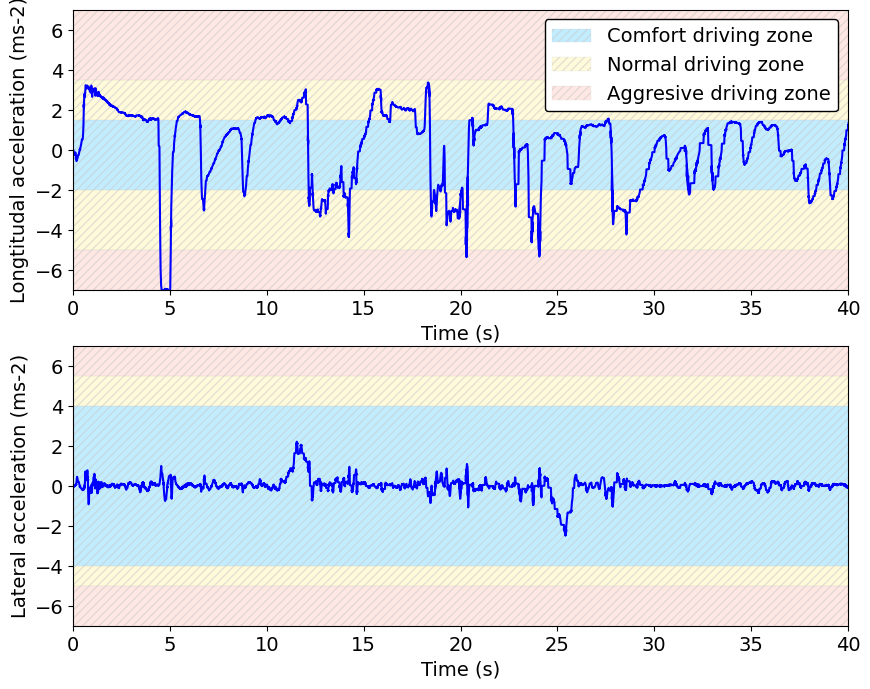

In [4]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize =(5, 5))
base_path = "C:/Users/user/Documents/pytorch-motion-planner/"

data_cross = np.load(f"{base_path}dumps/cross_1/imu_dump_1679237421.7472696.npy")
data_hotel = np.load(f"{base_path}dumps/hotel/imu_dump_1679310834.3492553.npy")
data_harbor = np.load(f"{base_path}dumps/harbor/imu_dump_1679307456.029499.npy")

from matplotlib.patches import Rectangle
figure, ax = plt.subplots(2, 1, figsize=(10, 8), sharey=True)

cross_filtered_lon = running_mean(data_cross[:,0], 100)
hotel_filtered_lon = running_mean(data_hotel[:,0], 100)
harbor_filtered_lon = running_mean(data_harbor[:,0], 100)
cross_filtered_lat = running_mean(data_cross[:,1], 100)
hotel_filtered_lat = running_mean(data_hotel[:,1], 100)
harbor_filtered_lat = running_mean(data_harbor[:,1], 100)


# Blue zone
# ax[0].plot([0, data[0,3]], [1.5, 1.5], color='green', linewidth=0.5)
# ax[0].plot([0, data[0,3]], [-2., -2.], color='green', linewidth=0.5)
lightgreen = (216/255, 1., 219/255)
lightyellow = (1., 246/255, 183/255)
lightblue = (135/255, 221/255, 255/255)
lighred = (255/255, 210/255, 200/255)
gray = (200/255, 200/255, 200/255)
hatch = '////'
# Longtitudal
lon_patch_blue = ax[0].add_patch(Rectangle((0., -2.), data_cross[0,3], 3.5, fill=True, facecolor=lightblue, hatch=hatch, alpha=0.5, edgecolor=gray, linewidth=0.25))
lon_patch_yellow =ax[0].add_patch(Rectangle((0., 1.5), data_cross[0,3], 2, fill=True, facecolor=lightyellow, hatch=hatch, alpha=0.5, edgecolor=gray, linewidth=0.25))
ax[0].add_patch(Rectangle((0., -5), data_cross[0,3], 3, fill=True, facecolor=lightyellow, hatch=hatch, alpha=0.5, edgecolor=gray, linewidth=0.25))
lon_patch_red =ax[0].add_patch(Rectangle((0., -10), data_cross[0,3], 5, fill=True, facecolor=lighred, hatch=hatch, alpha=0.5, edgecolor=gray, linewidth=0.25))
ax[0].add_patch(Rectangle((0., 3.5), data_cross[0,3], 5, fill=True, facecolor=lighred, hatch=hatch, alpha=0.5, edgecolor=gray, linewidth=0.25))

# Lateral
ax[1].add_patch(Rectangle((0., -4.), data_cross[0,3], 8, fill=True, facecolor=lightblue, hatch=hatch, alpha=0.5, edgecolor=gray, linewidth=0.25))
ax[1].add_patch(Rectangle((0., -5), data_cross[0,3], 1, fill=True, facecolor=lightyellow, hatch=hatch, alpha=0.5, edgecolor=gray, linewidth=0.25))
ax[1].add_patch(Rectangle((0., 4), data_cross[0,3], 1.5, fill=True, facecolor=lightyellow, hatch=hatch, alpha=0.5, edgecolor=gray, linewidth=0.25))
ax[1].add_patch(Rectangle((0., -10), data_cross[0,3], 5, fill=True, facecolor=lighred, hatch=hatch, alpha=0.5, edgecolor=gray, linewidth=0.25))
ax[1].add_patch(Rectangle((0., 5.5), data_cross[0,3], 5, fill=True, facecolor=lighred, hatch=hatch, alpha=0.5, edgecolor=gray, linewidth=0.25))

lon = ax[0].plot(data_cross[:,3]-data_cross[0,3], cross_filtered_lon, 'b')
ax[0].set_xlabel('Time (s)', fontsize=14.0)
ax[0].set_ylabel('Longtitudal acceleration (ms-2)', fontsize=14.0)
ax[0].tick_params(axis='x', labelsize=14)
ax[0].tick_params(axis='y', labelsize=14)

lat = ax[1].plot(data_cross[:,3]-data_cross[0,3],cross_filtered_lat, 'b-')
ax[1].set_xlabel('Time (s)', fontsize=14.0)
ax[1].set_ylabel('Lateral acceleration (ms-2)', fontsize=14.0)
ax[1].tick_params(axis='x', labelsize=14)
ax[1].tick_params(axis='y', labelsize=14)

ax[0].set_xlim([0,40])
ax[0].set_ylim([-7,7])
ax[1].set_xlim([0,40])
ax[1].set_ylim([-7,7])
ax[1].yaxis.set_tick_params(labelbottom=True)
# lon[0].set_label('Longitudinal acceleration')
# lat[0].set_label('Lateral acceleration')
lon_patch_blue.set_label('Comfort driving zone')
lon_patch_yellow.set_label('Normal driving zone')
lon_patch_red.set_label('Aggresive driving zone')
ax[0].legend(loc='upper right', framealpha=1.0,edgecolor=(0.0, 0.0, 0.0), fontsize=14)
jerk_lon = running_mean((cross_filtered_lon[1:] - cross_filtered_lon[:-1])/(data_cross[1:,3]-data_cross[:-1,3]), 8000)

# ax[2].add_patch(Rectangle((0., -2.), data_cross[0,3], 3.5, fill=True, facecolor=lightblue, hatch=hatch, alpha=0.5, edgecolor=gray, linewidth=0.25))
# ax[2].add_patch(Rectangle((0., 1.5), data_cross[0,3], 2, fill=True, facecolor=lightyellow, hatch=hatch, alpha=0.5, edgecolor=gray, linewidth=0.25))
# ax[2].add_patch(Rectangle((0., -5), data_cross[0,3], 3, fill=True, facecolor=lightyellow, hatch=hatch, alpha=0.5, edgecolor=gray, linewidth=0.25))
# ax[2].add_patch(Rectangle((0., -10), data_cross[0,3], 5, fill=True, facecolor=lighred, hatch=hatch, alpha=0.5, edgecolor=gray, linewidth=0.25))
# ax[2].add_patch(Rectangle((0., 3.5), data_cross[0,3], 5, fill=True, facecolor=lighred, hatch=hatch, alpha=0.5, edgecolor=gray, linewidth=0.25))



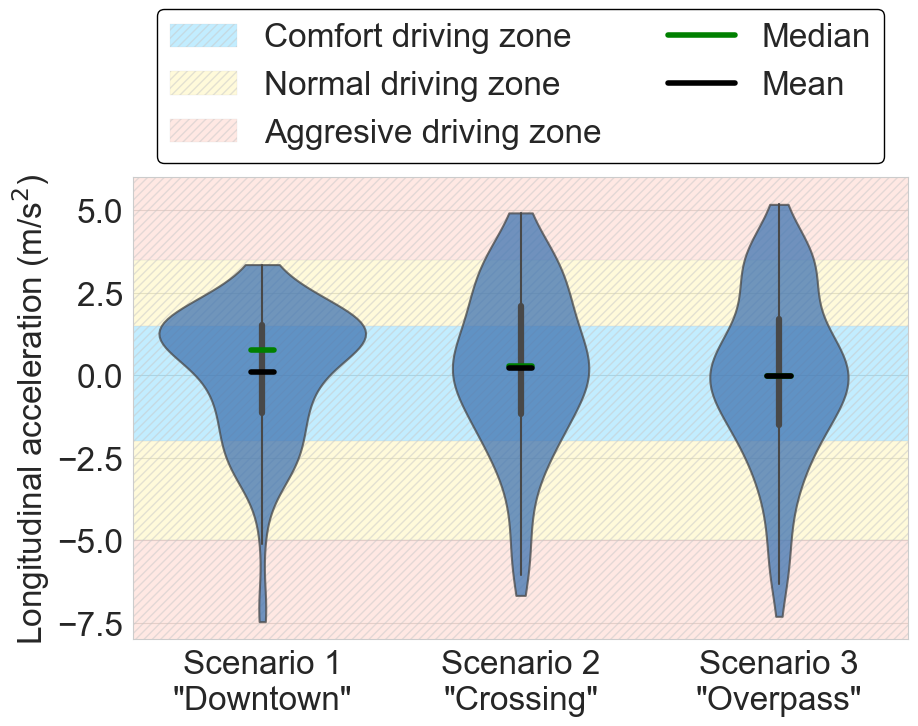

In [5]:

import seaborn as sns
sns.set_style("whitegrid")
figure, ax = plt.subplots(1, 1, figsize=(10,6), sharey=True)


lightgreen = (216/255, 1., 219/255)
lightyellow = (1., 246/255, 183/255)
lightblue = (135/255, 221/255, 255/255)
lighred = (255/255, 210/255, 200/255)

zone_blue = ax.add_patch(Rectangle((-2., -2.), data_cross[0,3], 3.5, fill=True, facecolor=lightblue, hatch=hatch, alpha=0.5, edgecolor=gray, linewidth=0.25))
ax.add_patch(Rectangle((-2., 1.5), data_cross[0,3], 2, fill=True, facecolor=lightyellow, hatch=hatch, alpha=0.5, edgecolor=gray, linewidth=0.25))
zone_yellow = ax.add_patch(Rectangle((-2., -5), data_cross[0,3], 3, fill=True, facecolor=lightyellow, hatch=hatch, alpha=0.5, edgecolor=gray, linewidth=0.25))
zone_red = ax.add_patch(Rectangle((-2., -10), data_cross[0,3], 5, fill=True, facecolor=lighred, hatch=hatch, alpha=0.5, edgecolor=gray, linewidth=0.25))
ax.add_patch(Rectangle((-2., 3.5), data_cross[0,3], 5, fill=True, facecolor=lighred, hatch=hatch, alpha=0.5, edgecolor=gray, linewidth=0.25))

textsize = 24

ax.set_ylabel("Longitudinal acceleration (m/s${{{}}}^{{{2}}}$)", fontsize=textsize)
ax.tick_params(axis='x', labelsize=textsize)
ax.tick_params(axis='y', labelsize=textsize)

ax.set_xlim([0,40])
ax.set_ylim([-8,6])
ax.yaxis.set_tick_params(labelbottom=True)
zone_blue.set_label('Comfort driving zone')
zone_yellow.set_label('Normal driving zone')
zone_red.set_label('Aggresive driving zone')

import numpy as np
x1median = np.median(cross_filtered_lon)
x2median = np.median(hotel_filtered_lon)
x3median = np.median(harbor_filtered_lon)

x1mean = np.mean(cross_filtered_lon)
x2mean = np.mean(hotel_filtered_lon)
x3mean = np.mean(harbor_filtered_lon)

plt.sca(ax)
sns.violinplot(data=[cross_filtered_lon, hotel_filtered_lon, harbor_filtered_lon], axes=ax, color=(45/255, 115/255, 196/255), cut=0, bw=0.4, labels = ["1", "2", "3"])
# sns.violinplot(data=[cross_filtered_lat[::10], hotel_filtered_lat[::10], harbor_filtered_lat[::10]], color=(45/255, 115/255, 196/255))

ax.set_xticklabels(['Scenario 1\n"Downtown"', 'Scenario 2\n"Crossing"', 'Scenario 3\n"Overpass"'])

for violin, alpha in zip(ax.collections[::2], [0.75,0.75,0.75]):
    violin.set_alpha(alpha)

stick = np.array([-0.045,0.045])
stick1 = stick
stick2 = stick+1
stick3 = stick+2
lw = 4.0

ax.plot(stick1, [x1median, x1median], label = "Median", color='g', linewidth=lw, zorder=1000)
ax.plot(stick1, [x1mean, x1mean], label = "Mean", color='black', linewidth=lw, zorder=1000)
ax.plot(stick2, [x2median, x2median], color='g', linewidth=lw, zorder=1000)
ax.plot(stick2, [x2mean, x2mean], color='black', linewidth=lw, zorder=1000)
ax.plot(stick3, [x3median, x3median], color='g', linewidth=lw, zorder=1000)
ax.plot(stick3, [x3mean, x3mean], color='black', linewidth=lw, zorder=1000)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.4), ncols=2,framealpha=1.0, edgecolor=(0.0, 0.0, 0.0), fontsize=textsize)


plt.show()

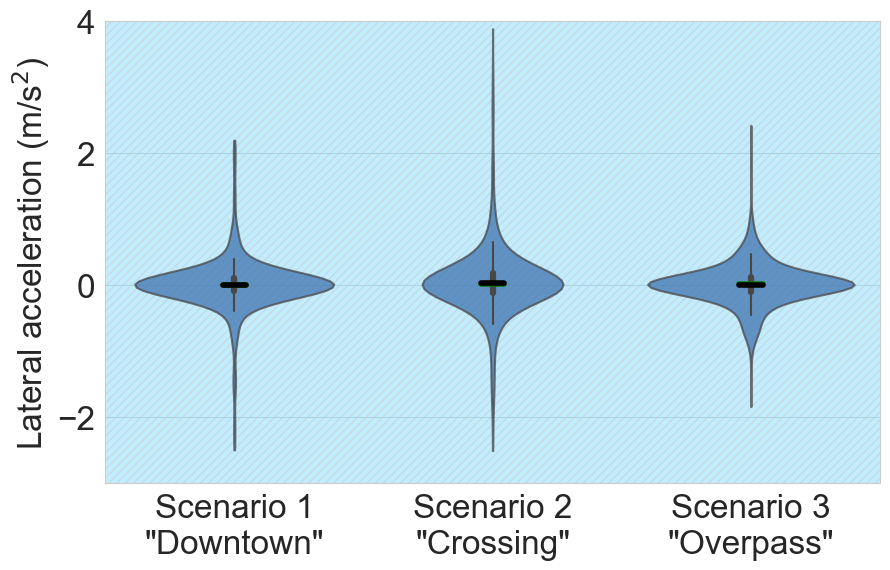

In [6]:

import seaborn as sns
sns.set_style("whitegrid")
figure, ax = plt.subplots(1, 1, figsize=(10,6), sharey=True)

textsize = 24

zone_blue = ax.add_patch(Rectangle((-2., -4.), data_cross[0,3], 8, fill=True, facecolor=lightblue, hatch=hatch, alpha=0.5, edgecolor=gray, linewidth=0.25))
# ax.add_patch(Rectangle((-2., -5.5), data_cross[0,3], 1.5, fill=True, facecolor=lightyellow, hatch=hatch, alpha=0.5, edgecolor=gray, linewidth=0.25))
# zone_yellow = ax.add_patch(Rectangle((-2., 4), data_cross[0,3], 1.5, fill=True, facecolor=lightyellow, hatch=hatch, alpha=0.5, edgecolor=gray, linewidth=0.25))
# zone_red = ax.add_patch(Rectangle((-2., -10), data_cross[0,3], 4.5, fill=True, facecolor=lighred, hatch=hatch, alpha=0.5, edgecolor=gray, linewidth=0.25))
# ax.add_patch(Rectangle((-2., 5.5), data_cross[0,3], 5, fill=True, facecolor=lighred, hatch=hatch, alpha=0.5, edgecolor=gray, linewidth=0.25))

ax.set_ylabel("Lateral acceleration (m/s${{{}}}^{{{2}}}$)", fontsize=textsize)
ax.tick_params(axis='x', labelsize=textsize)
ax.tick_params(axis='y', labelsize=textsize)

ax.set_xlim([0,40])
ax.set_ylim([-3,4])
ax.yaxis.set_tick_params(labelbottom=True)
zone_blue.set_label('Comfort driving zone')
# zone_yellow.set_label('Normal driving zone')
# zone_red.set_label('Aggresive driving zone')

import numpy as np
x1median = np.median(cross_filtered_lat)
x2median = np.median(hotel_filtered_lat)
x3median = np.median(harbor_filtered_lat)

x1mean = np.mean(cross_filtered_lat)
x2mean = np.mean(hotel_filtered_lat)
x3mean = np.mean(harbor_filtered_lat)

plt.sca(ax)
sns.violinplot(data=[cross_filtered_lat, hotel_filtered_lat, harbor_filtered_lat], axes=ax, color=(45/255, 115/255, 196/255), cut=0, bw=0.4, labels = ["1", "2", "3"])
# sns.violinplot(data=[cross_filtered_lat[::10], hotel_filtered_lat[::10], harbor_filtered_lat[::10]], color=(45/255, 115/255, 196/255))

ax.set_xticklabels(['Scenario 1\n"Downtown"', 'Scenario 2\n"Crossing"', 'Scenario 3\n"Overpass"'])

for violin, alpha in zip(ax.collections[::2], [0.75,0.75,0.75]):
    violin.set_alpha(alpha)

stick = np.array([-0.045,0.045])
stick1 = stick
stick2 = stick+1
stick3 = stick+2
lw = 4.0

ax.plot(stick1, [x1median, x1median], label = "Median", color='g', linewidth=lw, zorder=1000)
ax.plot(stick1, [x1mean, x1mean], label = "Mean", color='black', linewidth=lw, zorder=1000)
ax.plot(stick2, [x2median, x2median], color='g', linewidth=lw, zorder=1000)
ax.plot(stick2, [x2mean, x2mean], color='black', linewidth=lw, zorder=1000)
ax.plot(stick3, [x3median, x3median], color='g', linewidth=lw, zorder=1000)
ax.plot(stick3, [x3mean, x3mean], color='black', linewidth=lw, zorder=1000)

# ax.legend(loc='upper left', framealpha=1.0,edgecolor=(0.0, 0.0, 0.0), fontsize=14)


plt.show()

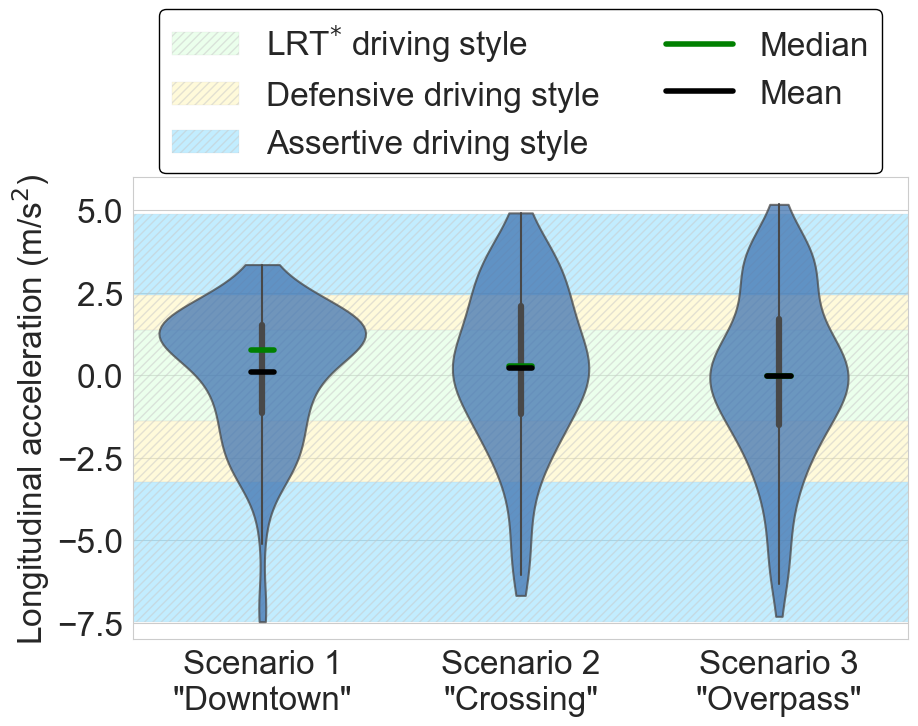

In [8]:

import seaborn as sns
sns.set_style("whitegrid")
figure, ax = plt.subplots(1, 1, figsize=(10,6), sharey=True)
g = 9.81

lightgreen = (216/255, 1., 219/255)
lightyellow = (1., 246/255, 183/255)
lightblue = (135/255, 221/255, 255/255)
lighred = (255/255, 210/255, 200/255)

zone_blue = ax.add_patch(Rectangle((-2., -0.14*g), data_cross[0,3], (0.14+0.14)*g, fill=True, facecolor=lightgreen, hatch=hatch, alpha=0.5, edgecolor=gray, linewidth=0.25))

ax.add_patch(Rectangle((-2., 0.14*g), data_cross[0,3], (0.25-0.14)*g, fill=True, facecolor=lightyellow, hatch=hatch, alpha=0.5, edgecolor=gray, linewidth=0.25))
zone_yellow = ax.add_patch(Rectangle((-2., -0.33*g), data_cross[0,3], (0.33-0.14)*g, fill=True, facecolor=lightyellow, hatch=hatch, alpha=0.5, edgecolor=gray, linewidth=0.25))

zone_red = ax.add_patch(Rectangle((-2., -0.76*g), data_cross[0,3], (0.76-0.33)*g, fill=True, facecolor=lightblue, hatch=hatch, alpha=0.5, edgecolor=gray, linewidth=0.25))
ax.add_patch(Rectangle((-2., 0.25*g), data_cross[0,3], (0.25)*g, fill=True, facecolor=lightblue, hatch=hatch, alpha=0.5, edgecolor=gray, linewidth=0.25))

# zone_restr = ax.add_patch(Rectangle((-2., -0.76*g), data_cross[0,3], (0.76-0.33)*g, fill=True, facecolor=lightblue, hatch=hatch, alpha=0.5, edgecolor=gray, linewidth=0.25))
# ax.add_patch(Rectangle((-2., 0.25*g), data_cross[0,3], (0.5)*g, fill=True, facecolor=lightblue, hatch=hatch, alpha=0.5, edgecolor=gray, linewidth=0.25))


textsize = 24

ax.set_ylabel("Longitudinal acceleration (m/s${{{}}}^{{{2}}}$)", fontsize=textsize)
ax.tick_params(axis='x', labelsize=textsize)
ax.tick_params(axis='y', labelsize=textsize)

ax.set_xlim([0,40])
ax.set_ylim([-8,6])
ax.yaxis.set_tick_params(labelbottom=True)
zone_blue.set_label('LRT$^{{{*}}}$ driving style')
zone_yellow.set_label('Defensive driving style')
zone_red.set_label('Assertive driving style')

import numpy as np
x1median = np.median(cross_filtered_lon)
x2median = np.median(hotel_filtered_lon)
x3median = np.median(harbor_filtered_lon)

x1mean = np.mean(cross_filtered_lon)
x2mean = np.mean(hotel_filtered_lon)
x3mean = np.mean(harbor_filtered_lon)

plt.sca(ax)
sns.violinplot(data=[cross_filtered_lon, hotel_filtered_lon, harbor_filtered_lon], axes=ax, color=(45/255, 115/255, 196/255), cut=0, bw=0.4, labels = ["1", "2", "3"])
# sns.violinplot(data=[cross_filtered_lat[::10], hotel_filtered_lat[::10], harbor_filtered_lat[::10]], color=(45/255, 115/255, 196/255))

ax.set_xticklabels(['Scenario 1\n"Downtown"', 'Scenario 2\n"Crossing"', 'Scenario 3\n"Overpass"'])

for violin, alpha in zip(ax.collections[::2], [0.75,0.75,0.75]):
    violin.set_alpha(alpha)

stick = np.array([-0.045,0.045])
stick1 = stick
stick2 = stick+1
stick3 = stick+2
lw = 4.0

ax.plot(stick1, [x1median, x1median], label = "Median", color='g', linewidth=lw, zorder=1000)
ax.plot(stick1, [x1mean, x1mean], label = "Mean", color='black', linewidth=lw, zorder=1000)
ax.plot(stick2, [x2median, x2median], color='g', linewidth=lw, zorder=1000)
ax.plot(stick2, [x2mean, x2mean], color='black', linewidth=lw, zorder=1000)
ax.plot(stick3, [x3median, x3median], color='g', linewidth=lw, zorder=1000)
ax.plot(stick3, [x3mean, x3mean], color='black', linewidth=lw, zorder=1000)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.4), ncols=2,framealpha=1.0, edgecolor=(0.0, 0.0, 0.0), fontsize=textsize)


plt.show()

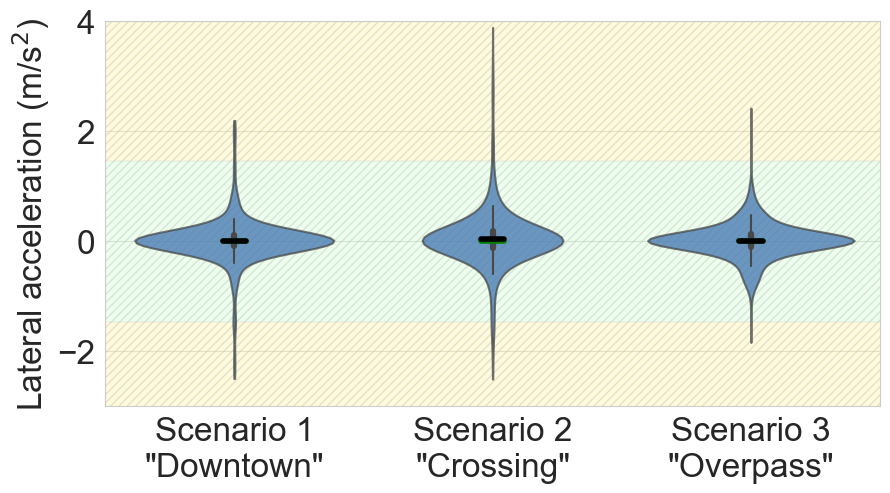

In [10]:

import seaborn as sns
sns.set_style("whitegrid")
figure, ax = plt.subplots(1, 1, figsize=(10,5), sharey=True)

textsize = 24

zone_blue = ax.add_patch(Rectangle((-2., -0.15*g), data_cross[0,3], (0.15+0.15)*g, fill=True, facecolor=lightgreen, hatch=hatch, alpha=0.5, edgecolor=gray, linewidth=0.25))

ax.add_patch(Rectangle((-2., 0.15*g), data_cross[0,3], (0.42-0.15)*g, fill=True, facecolor=lightyellow, hatch=hatch, alpha=0.5, edgecolor=gray, linewidth=0.25))
zone_yellow = ax.add_patch(Rectangle((-2., -0.42*g), data_cross[0,3], (0.42-0.15)*g, fill=True, facecolor=lightyellow, hatch=hatch, alpha=0.5, edgecolor=gray, linewidth=0.25))

zone_red = ax.add_patch(Rectangle((-2., -0.54*g), data_cross[0,3], (0.54-0.42)*g, fill=True, facecolor=lightblue, hatch=hatch, alpha=0.5, edgecolor=gray, linewidth=0.25))
ax.add_patch(Rectangle((-2., 0.42*g), data_cross[0,3], (0.54-0.42)*g, fill=True, facecolor=lightblue, hatch=hatch, alpha=0.5, edgecolor=gray, linewidth=0.25))

ax.set_ylabel("Lateral acceleration (m/s${{{}}}^{{{2}}}$)", fontsize=textsize)
ax.tick_params(axis='x', labelsize=textsize)
ax.tick_params(axis='y', labelsize=textsize)

ax.set_xlim([0,40])
ax.set_ylim([-3,4])
ax.yaxis.set_tick_params(labelbottom=True)
zone_blue.set_label('LRT$^{{{*}}}$ driving style')
zone_yellow.set_label('Defensive driving style')
zone_red.set_label('Assertive driving style')

import numpy as np
x1median = np.median(cross_filtered_lat)
x2median = np.median(hotel_filtered_lat)
x3median = np.median(harbor_filtered_lat)

x1mean = np.mean(cross_filtered_lat)
x2mean = np.mean(hotel_filtered_lat)
x3mean = np.mean(harbor_filtered_lat)

plt.sca(ax)
sns.violinplot(data=[cross_filtered_lat, hotel_filtered_lat, harbor_filtered_lat], axes=ax, color=(45/255, 115/255, 196/255), cut=0, bw=0.4, labels = ["1", "2", "3"])
# sns.violinplot(data=[cross_filtered_lat[::10], hotel_filtered_lat[::10], harbor_filtered_lat[::10]], color=(45/255, 115/255, 196/255))

ax.set_xticklabels(['Scenario 1\n"Downtown"', 'Scenario 2\n"Crossing"', 'Scenario 3\n"Overpass"'])

for violin, alpha in zip(ax.collections[::2], [0.75,0.75,0.75]):
    violin.set_alpha(alpha)

stick = np.array([-0.045,0.045])
stick1 = stick
stick2 = stick+1
stick3 = stick+2
lw = 4.0

ax.plot(stick1, [x1median, x1median], label = "Median", color='g', linewidth=lw, zorder=1000)
ax.plot(stick1, [x1mean, x1mean], label = "Mean", color='black', linewidth=lw, zorder=1000)
ax.plot(stick2, [x2median, x2median], color='g', linewidth=lw, zorder=1000)
ax.plot(stick2, [x2mean, x2mean], color='black', linewidth=lw, zorder=1000)
ax.plot(stick3, [x3median, x3median], color='g', linewidth=lw, zorder=1000)
ax.plot(stick3, [x3mean, x3mean], color='black', linewidth=lw, zorder=1000)

# ax.legend(loc='upper left', framealpha=1.0,edgecolor=(0.0, 0.0, 0.0), fontsize=14)


plt.show()

In [24]:
assertive1 = cross_filtered_lon < -0.33*g
assertive1 |= cross_filtered_lon > 0.25*g
assertive2 = hotel_filtered_lon < -0.33*g 
assertive2 |= hotel_filtered_lon > 0.25*g
assertive3 = harbor_filtered_lon < -0.33*g 
assertive3 |= harbor_filtered_lon > 0.25*g
assertive = np.concatenate([assertive1, assertive2, assertive3])
avg_assertive = 100*np.mean([sum(assertive1)/len(assertive1), sum(assertive2)/len(assertive2), sum(assertive3)/len(assertive3)])
###

defensive1_1 = cross_filtered_lon < -0.14*g
defensive1_1 &= cross_filtered_lon > -0.33*g
defensive1_2 = cross_filtered_lon > 0.14*g
defensive1_2 &= cross_filtered_lon < 0.25*g
defensive1 = defensive1_1 | defensive1_2

defensive2_1 = hotel_filtered_lon < -0.14*g
defensive2_1 &= hotel_filtered_lon > -0.33*g
defensive2_2 = hotel_filtered_lon > 0.14*g
defensive2_2 &= hotel_filtered_lon < 0.25*g
defensive2 = defensive2_1 | defensive2_2

defensive3_1 = harbor_filtered_lon < -0.14*g
defensive3_1 &= harbor_filtered_lon > -0.33*g
defensive3_2 = harbor_filtered_lon > 0.14*g
defensive3_2 &= harbor_filtered_lon < 0.25*g
defensive3 = defensive3_1 | defensive3_2

defensive = np.concatenate([defensive1, defensive2, defensive3])
avg_defensive = 100*np.mean([sum(defensive1)/len(defensive1), sum(defensive2)/len(defensive2), sum(defensive3)/len(defensive3)])
###

lrt1 = cross_filtered_lon < 0.14*g
lrt1 &= cross_filtered_lon > -0.14*g

lrt2 = hotel_filtered_lon < 0.14*g
lrt2 &= hotel_filtered_lon > -0.14*g

lrt3 = harbor_filtered_lon < 0.14*g
lrt3 &= harbor_filtered_lon > -0.14*g

lrt = np.concatenate([lrt1, lrt2, lrt3])
avg_lrt = 100*np.mean([sum(lrt1)/len(lrt1), sum(lrt2)/len(lrt2), sum(lrt3)/len(lrt3)])

sum_lrt = np.sum(lrt)
sum_assertive = np.sum(assertive)
sum_defensive = np.sum(defensive)

print("aggregate", 100*np.array([sum_lrt, sum_defensive, sum_assertive])/(len(lrt)))
print("average", [avg_assertive, avg_defensive, avg_lrt])

aggregate [45.92926146 31.41450899 22.65622955]
average [22.619683191315325, 31.447166278726286, 45.9331505299584]


In [25]:
aggressive1 = cross_filtered_lon < -5
aggressive1 |= cross_filtered_lon > 3.5
aggressive2 = hotel_filtered_lon < -5
aggressive2 |= hotel_filtered_lon > 3.5
aggressive3 = harbor_filtered_lon < -5
aggressive3 |= harbor_filtered_lon > 3.5
aggressive = np.concatenate([aggressive1, aggressive2, aggressive3])

###

normal1_1 = cross_filtered_lon < -2
normal1_1 &= cross_filtered_lon > -5
normal1_2 = cross_filtered_lon > 1.5
normal1_2 &= cross_filtered_lon < 3.5
normal1 = normal1_1 | normal1_2

normal2_1 = hotel_filtered_lon < -2
normal2_1 &= hotel_filtered_lon > -5
normal2_2 = hotel_filtered_lon > 1.5
normal2_2 &= hotel_filtered_lon < 3.5
normal2 = normal2_1 | normal2_2

normal3_1 = harbor_filtered_lon < -2
normal3_1 &= harbor_filtered_lon > -5
normal3_2 = harbor_filtered_lon > 1.5
normal3_2 &= harbor_filtered_lon < 3.5
normal3 = normal3_1 | normal3_2

normal = np.concatenate([normal1, normal2, normal3])

###

comfort1 = cross_filtered_lon < 1.5
comfort1 &= cross_filtered_lon > -2

comfort2 = hotel_filtered_lon < 1.5
comfort2 &= hotel_filtered_lon > -2

comfort3 = harbor_filtered_lon < 1.5
comfort3 &= harbor_filtered_lon > -2

comfort = np.concatenate([comfort1, comfort2, comfort3])

sum_comfort = np.sum(comfort)
sum_aggressive = np.sum(aggressive)
sum_normal = np.sum(normal)

print(100*np.array([sum_comfort, sum_normal, sum_aggressive])/(len(lrt)))


[54.93232453 34.73833024 10.32934524]


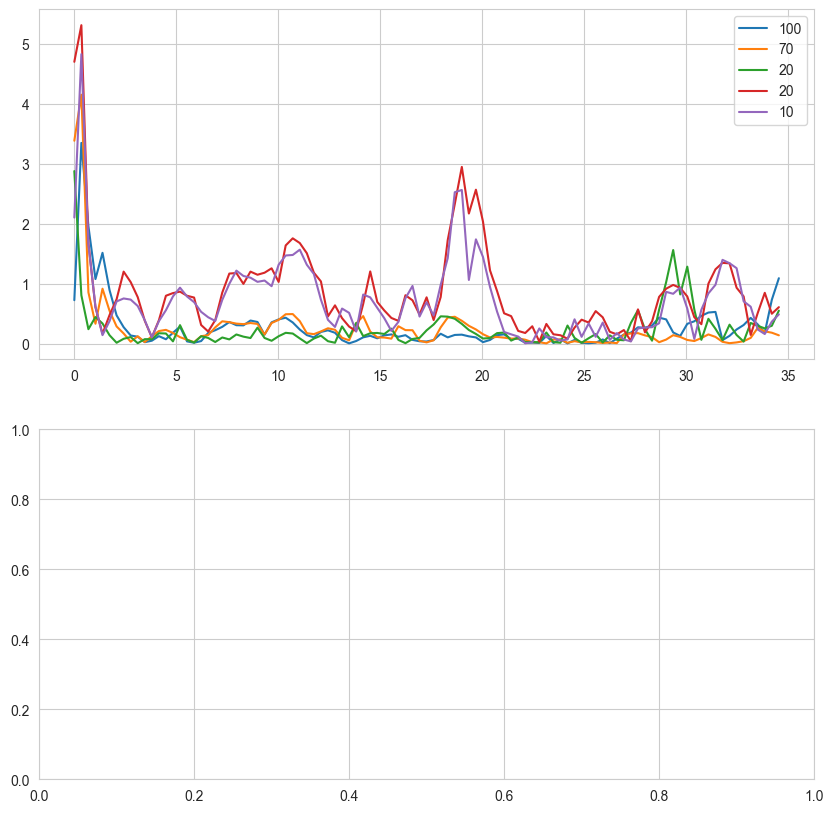

In [11]:
def this_interpolate_2d_positions(positions: np.ndarray, old_times: np.ndarray, new_times: np.ndarray) -> np.ndarray:
    assert len(positions.shape) == 2, f"Interpolate 2D positions require rectangular array [N,3], but given shape is {positions.shape}"
    assert positions.shape[1] == 3, f"Interpolate 2D positions require rectangular array [N,3], but length of the first dimension {positions.shape[1]}"
    assert len(old_times.shape) == len(new_times.shape) == 2, f"Interpolate 2D times require rectangular array [N,1], but given shape is {old_times.shape}, {new_times.shape}"
    assert old_times.shape[1] == new_times.shape[1] == 1, f"Interpolate 2D times require rectangular array [N,1], but length of the first dimension {positions.shape[0]}"
    upper_indices: np.ndarray = np.searchsorted(old_times[:,0], new_times[:,0])[:, np.newaxis]
    lower_indices: np.ndarray = upper_indices - 1
    lower_indices = np.where(lower_indices > 0, lower_indices, 0)
    upper_indices = np.where(upper_indices < positions.shape[0], upper_indices, positions.shape[0] - 1)
    lower_old_times = np.take(old_times, lower_indices)
    upper_old_times = np.take(old_times, upper_indices)
    lower_x: np.ndarray = positions[lower_indices]
    upper_x: np.ndarray = positions[upper_indices]
    denominator = np.array(upper_old_times - lower_old_times, dtype=np.float32)
    denominator = np.where(np.abs(denominator) > 1e-3, denominator, np.full_like(denominator, 1e-3))
    weights = (new_times - lower_old_times) / denominator
    weights = weights[:, None]
    interpolated_values = (1 - weights) * lower_x + weights * upper_x
    return np.squeeze(interpolated_values)

import math

def dot(v,w):
    x,y,z = v
    X,Y,Z = w
    return x*X + y*Y + z*Z

def length(v):
    x,y,z = v
    return math.sqrt(x*x + y*y + z*z)

def vector(b,e):
    x,y,z = b
    X,Y,Z = e
    return (X-x, Y-y, Z-z)

def unit(v):
    x,y,z = v
    mag = length(v)
    return (x/mag, y/mag, z/mag)

def distance(p0,p1):
    return length(vector(p0,p1))

def scale(v,sc):
    x,y,z = v
    return (x * sc, y * sc, z * sc)

def add(v,w):
    x,y,z = v
    X,Y,Z = w
    return (x+X, y+Y, z+Z)


# Given a line with coordinates 'start' and 'end' and the
# coordinates of a point 'pnt' the proc returns the shortest 
# distance from pnt to the line and the coordinates of the 
# nearest point on the line.
#
# 1  Convert the line segment to a vector ('line_vec').
# 2  Create a vector connecting start to pnt ('pnt_vec').
# 3  Find the length of the line vector ('line_len').
# 4  Convert line_vec to a unit vector ('line_unitvec').
# 5  Scale pnt_vec by line_len ('pnt_vec_scaled').
# 6  Get the dot product of line_unitvec and pnt_vec_scaled ('t').
# 7  Ensure t is in the range 0 to 1.
# 8  Use t to get the nearest location on the line to the end
#    of vector pnt_vec_scaled ('nearest').
# 9  Calculate the distance from nearest to pnt_vec_scaled.
# 10 Translate nearest back to the start/end line. 
# Malcolm Kesson 16 Dec 2012

def pnt2line(pnt, start, end):
    line_vec = vector(start, end)
    pnt_vec = vector(start, pnt)
    line_len = length(line_vec)
    line_unitvec = unit(line_vec)
    pnt_vec_scaled = scale(pnt_vec, 1.0/line_len)
    t = dot(line_unitvec, pnt_vec_scaled)    
    if t < 0.0:
        t = 0.0
    elif t > 1.0:
        t = 1.0
    nearest = scale(line_vec, t)
    dist = distance(nearest, pnt_vec)
    nearest = add(nearest, start)
    return (dist, nearest)

def get_pathfollowing_error(trajectory, poses, dt):
    interpolated_trajectory = this_interpolate_2d_positions(trajectory[:,1:],
                                            np.array(trajectory[:,0]).reshape((len(trajectory[:,0]), 1)),
                                                np.array(poses[:,2]-poses[0,2]-dt).reshape((len(poses[:,2]), 1)))
    err_x = np.abs(poses[:,0]) - np.abs(np.array(interpolated_trajectory[:,0]))
    err_y = np.abs(poses[:,1]) - np.abs(np.array(interpolated_trajectory[:,1]))
    err = np.array([err_x, err_y, np.zeros_like(err_x)])
    err = this_interpolate_2d_positions(err.T,
        np.array(poses[:,2]-poses[0,2]-2).reshape((len(poses[:,2]), 1)),
        np.array(trajectory[:,0]).reshape((len(trajectory[:,0]), 1)))
    err = np.sqrt((np.abs(err[1:,0]) - np.abs(err[:-1,0]))**2 + (np.abs(err[1:,1]) - np.abs(err[:-1,1]))**2)
    return err

base_path = "C:/Users/user/Documents/pytorch-motion-planner"
figure, ax = plt.subplots(2, 1, figsize=(10, 10))
# test 100%
trajectory1 = np.load(f"{base_path}/dumps/cross_1/exp001/trajectory_1679439733.8771145.npy") # t x y theta
poses1 = np.load(f"{base_path}/dumps/cross_1/exp001/pose_dump_1679439779.6810696.npy") # x y t
err1 = get_pathfollowing_error(trajectory1, poses1, 2)
ax[0].plot(trajectory1[:-1,0], err1, label="100")

# 70%
trajectory2 = np.load(f"{base_path}/dumps/cross_1/exp005/trajectory_1679442451.0765426.npy") # t x y theta
poses2 = np.load(f"{base_path}/dumps/cross_1/exp005/pose_dump_1679442496.6345513.npy") # x y t
err2 = get_pathfollowing_error(trajectory2, poses2, 2)
ax[0].plot(trajectory2[:-1,0], err2, label = "70")

# 50%
trajectory3 = np.load(f"{base_path}/dumps/cross_1/exp002/trajectory_1679441007.966667.npy") # t x y theta
poses3 = np.load(f"{base_path}/dumps/cross_1/exp002/pose_dump_1679441053.3258045.npy") # x y t
err3 = get_pathfollowing_error(trajectory3, poses3, 2)
ax[0].plot(trajectory3[:-1,0], err3, label = "20")

# 20%
trajectory4 = np.load(f"{base_path}/dumps/cross_1/exp003/trajectory_1679441748.71136.npy") # t x y theta
poses4 = np.load(f"{base_path}/dumps/cross_1/exp003/pose_dump_1679441794.0183184.npy") # x y t
err4 = get_pathfollowing_error(trajectory4, poses4, 2)
ax[0].plot(trajectory4[:-1,0], err4, label = "20")

# 10%
trajectory5 = np.load(f"{base_path}/dumps/cross_1/exp004/trajectory_1679442811.8211405.npy") # t x y theta
poses5 = np.load(f"{base_path}/dumps/cross_1/exp004/pose_dump_1679442857.2078366.npy") # x y t
err5 = get_pathfollowing_error(trajectory5, poses5, 2)
ax[0].plot(trajectory5[:-1,0], err5, label = "10")

ax[0].legend()

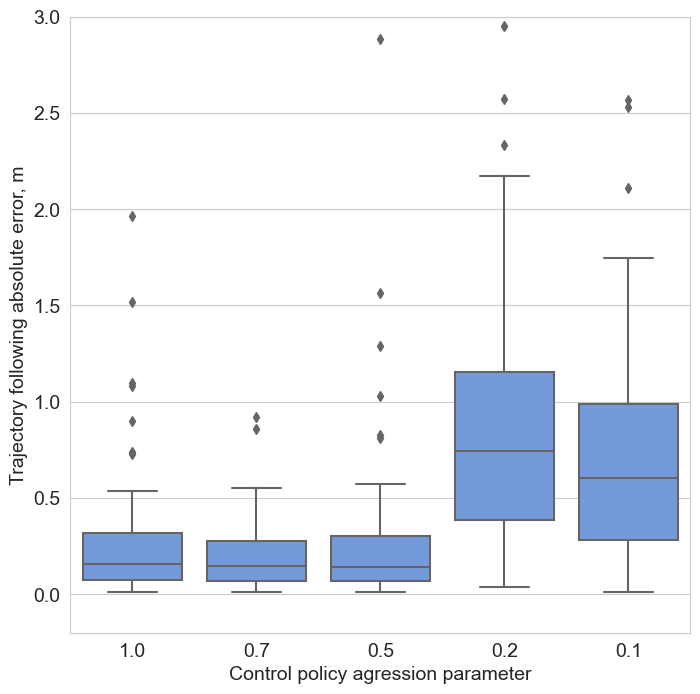

In [27]:
import seaborn as sns
sns.set_style("whitegrid")
figure, ax = plt.subplots(1, 1, figsize=(8, 8), sharey=True)

# zone_blue = ax.add_patch(Rectangle((-2., -3.), 8, 4.5, fill=True, facecolor=lightblue, hatch=hatch, alpha=0.5, edgecolor=gray, linewidth=0.25, zorder=-100))
# zone_red = ax.add_patch(Rectangle((-2., 1.5), 8, 5, fill=True, facecolor=lighred, hatch=hatch, alpha=0.5, edgecolor=gray, linewidth=0.25))
# ax.set_ylabel('Longtitudal acceleration (ms-2)', fontsize=14.0)
ax.set_ylabel('Trajectory following absolute error (m)', fontsize=14.0)
ax.set_xlabel('Control policy agression parameter', fontsize=14.0)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

ax.set_ylim([-0.2, 3])
ax.yaxis.set_tick_params(labelbottom=True)

# zone_blue.set_label('Admissible driving area')
# zone_red.set_label('Restricted area')
# ax.legend(loc='upper left', framealpha=1.0,edgecolor=(0.0, 0.0, 0.0), fontsize=14)

sns.boxplot(data=[err1, err2, err3, err4, err5], color='cornflowerblue')

ax.set_xticklabels(['1.0', '0.7', '0.5', '0.2', '0.1'])
for violin, alpha in zip(ax.collections[::2], [0.75,0.75,0.75]):

    violin.set_alpha(alpha)

plt.show()

<Figure size 500x500 with 0 Axes>

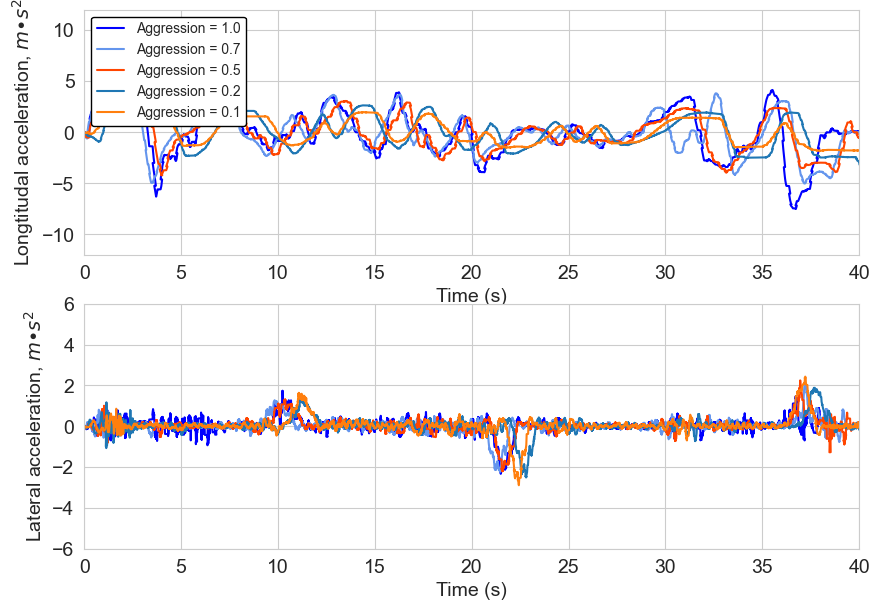

In [10]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize =(5, 5))
base_path = "C:/Users/user/Documents/pytorch-motion-planner"

data_100 = np.load(f"{base_path}/dumps/cross_1/exp001/imu_dump_1679439779.5923088.npy")
data_50 = np.load(f"{base_path}/dumps/cross_1/exp005/imu_dump_1679442496.554258.npy")
data_70 = np.load(f"{base_path}/dumps/cross_1/exp002/imu_dump_1679441053.2489846.npy")
data_20 = np.load(f"{base_path}/dumps/cross_1/exp003/imu_dump_1679441793.9205594.npy")
data_10 = np.load(f"{base_path}/dumps/cross_1/exp004/imu_dump_1679442857.1210678.npy")

from matplotlib.patches import Rectangle
figure, ax = plt.subplots(2, 1, figsize=(10, 7))

window1 = 2000
window2 = 100

data_100_filt_lon = running_mean(data_100[:,0], window1)
data_70_filt_lon = running_mean(data_70[:,0], window1)
data_50_filt_lon = running_mean(data_50[:,0], window1)
data_20_filt_lon = running_mean(data_20[:,0], window1)
data_10_filt_lon = running_mean(data_10[:,0], window1)

data_100_filt_lat = running_mean(data_100[:,1], window2)
data_70_filt_lat = running_mean(data_70[:,1], window2)
data_50_filt_lat = running_mean(data_50[:,1], window2)
data_20_filt_lat = running_mean(data_20[:,1], window2)
data_10_filt_lat = running_mean(data_10[:,1], window2)

ax[0].plot(data_100[:,3]-data_100[0,3], data_100_filt_lon, 'b', label = 'Aggression = 1.0')
ax[0].plot(data_70[:,3]-data_70[0,3], data_70_filt_lon, 'cornflowerblue', label = 'Aggression = 0.7')
ax[0].plot(data_50[:,3]-data_50[0,3], data_50_filt_lon, 'orangered', label = 'Aggression = 0.5')
ax[0].plot(data_20[:,3]-data_20[0,3], data_20_filt_lon, label = 'Aggression = 0.2')
ax[0].plot(data_10[:,3]-data_10[0,3], data_10_filt_lon, label = 'Aggression = 0.1')
ax[0].set_xlabel('Time (s)', fontsize=14.0)

ax[0].set_ylabel("Longtitudal acceleration, $m•{{{}}}s^{{{2}}}$", fontsize=14.0)
ax[0].tick_params(axis='x', labelsize=14)
ax[0].tick_params(axis='y', labelsize=14)

ax[1].plot(data_100[:,3]-data_100[0,3],data_100_filt_lat, 'b', label = 'Aggression = 1.0')
ax[1].plot(data_70[:,3]-data_70[0,3],data_70_filt_lat, 'cornflowerblue', label = 'Aggression = 0.7')
ax[1].plot(data_50[:,3]-data_50[0,3],data_50_filt_lat, 'orangered', label = 'Aggression = 0.5')
ax[1].plot(data_20[:,3]-data_20[0,3],data_20_filt_lat, label = 'Aggression = 0.2')
ax[1].plot(data_10[:,3]-data_10[0,3],data_10_filt_lat, label = 'Aggression = 0.1')
ax[1].set_xlabel('Time (s)', fontsize=14.0)
ax[1].set_ylabel("Lateral acceleration, $m•{{{}}}s^{{{2}}}$", fontsize=14.0)
ax[1].tick_params(axis='x', labelsize=14)
ax[1].tick_params(axis='y', labelsize=14)

ax[0].set_xlim([0,40])
ax[0].set_ylim([-12,12])
ax[1].set_xlim([0,40])
ax[1].set_ylim([-6,6])
ax[1].yaxis.set_tick_params(labelbottom=True)

ax[0].legend(loc='upper left', framealpha=1.0,edgecolor=(0.0, 0.0, 0.0), fontsize=10)


[4.52303483 4.00392923 4.52555636 5.25543368 4.51959392]
[0.67680548 0.5852377  0.65203592 2.30657622 2.04541293]


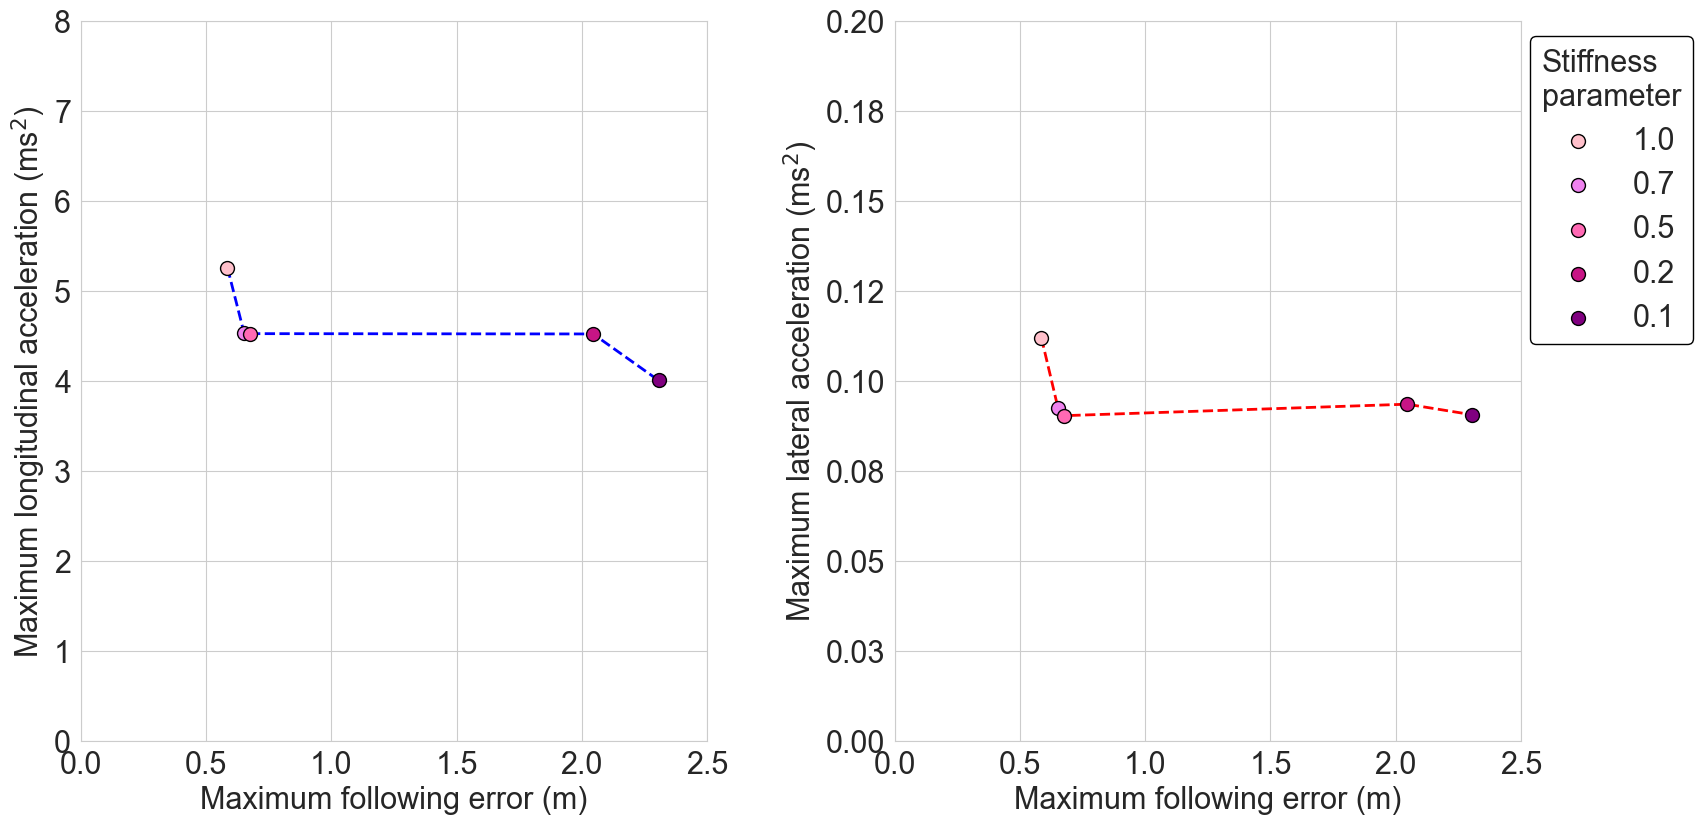

In [16]:
magnetude_lon = [np.median(np.abs(data_100_filt_lon)), np.median(np.abs(data_70_filt_lon)), np.median(np.abs(data_50_filt_lon)), np.median(np.abs(data_10_filt_lon)), np.median(np.abs(data_20_filt_lon))]
magnetude_lat = [np.median(np.abs(data_100_filt_lat)), np.median(np.abs(data_70_filt_lat)), np.median(np.abs(data_50_filt_lat)), np.median(np.abs(data_20_filt_lat)), np.median(np.abs(data_10_filt_lat))]
errors = [np.median(err1), np.median(err2), np.median(err3), np.median(err4), np.median(err5)]

max_100 = np.percentile(err1, [25, 75])[1] + 1.5*np.subtract(*np.percentile(err1, [75, 25]))
max_70 = np.percentile(err2, [25, 75])[1] + 1.5*np.subtract(*np.percentile(err2, [75, 25]))
max_50 = np.percentile(err3, [25, 75])[1] + 1.5*np.subtract(*np.percentile(err3, [75, 25]))
max_20 = np.percentile(err4, [25, 75])[1] + 1.5*np.subtract(*np.percentile(err4, [75, 25]))
max_10 = np.percentile(err5, [25, 75])[1] + 1.5*np.subtract(*np.percentile(err5, [75, 25]))

errors = np.array([max_100, max_70, max_50, max_20, max_10])

max_100 = np.percentile(data_100_filt_lon, [25, 75])[1] + 1.5*np.subtract(*np.percentile(data_100_filt_lon, [75, 25]))
max_70 = np.percentile(data_70_filt_lon, [25, 75])[1] + 1.5*np.subtract(*np.percentile(data_70_filt_lon, [75, 25]))
max_50 = np.percentile(data_50_filt_lon, [25, 75])[1] + 1.5*np.subtract(*np.percentile(data_50_filt_lon, [75, 25]))
max_20 = np.percentile(data_20_filt_lon, [25, 75])[1] + 1.5*np.subtract(*np.percentile(data_20_filt_lon, [75, 25]))
max_10 = np.percentile(data_10_filt_lon, [25, 75])[1] + 1.5*np.subtract(*np.percentile(data_10_filt_lon, [75, 25]))

magnetude_lon = np.array([max_100, max_70, max_50, max_20, max_10])

print(magnetude_lon)
print(errors)

errors = np.sort(errors)
magnetude_lon = np.sort(magnetude_lon)[::-1]

figure, axes = plt.subplots(1, 2, figsize=(18, 9))
textsize = 22
ax = axes[0]
ax.set_xlabel("Maximum following error (m)", fontsize=textsize)
ax.set_ylabel("Maximum longitudinal acceleration (ms${{{}}}^{{{2}}}$)", fontsize=textsize)
ax.tick_params(axis='x', labelsize=textsize)
ax.tick_params(axis='y', labelsize=textsize)
ax.set_ylim([0, 8])
ax.set_xlim([0, 2.5])
ax.yaxis.set_tick_params(labelbottom=True)
ax.plot(errors, magnetude_lon, linestyle='dashed', color='blue', linewidth=2.0)

colors = ['pink', 'violet', 'hotpink', 'mediumvioletred', 'purple']
labels = ['1.0', '0.7', '0.5', '0.2', '0.1']
for err, magn, color, label in zip(errors,magnetude_lon,colors,labels):
    ax.scatter(err,magn, label=label, s=100, facecolor=color, edgecolor='black', zorder=1000)

ax = axes[1]
ax.set_xlabel("Maximum following error (m)", fontsize=textsize)
ax.set_ylabel("Maximum lateral acceleration (ms${{{}}}^{{{2}}}$)", fontsize=textsize)
ax.tick_params(axis='x', labelsize=textsize)
ax.tick_params(axis='y', labelsize=textsize)
ax.set_ylim([0, 0.2])
ax.set_xlim([0, 2.5])
ax.yaxis.set_tick_params(labelbottom=True)
from matplotlib.ticker import FormatStrFormatter
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.plot(errors, magnetude_lat, linestyle='dashed', color='red', linewidth=2.0)
colors = ['pink', 'violet', 'hotpink', 'mediumvioletred', 'purple']
labels = ['1.0', '0.7', '0.5', '0.2', '0.1']
for err, magn, color, label in zip(errors,magnetude_lat,colors,labels):
    ax.scatter(err,magn, label=label, s=100, facecolor=color, edgecolor='black', zorder=1000)

leg = ax.legend(loc='upper right', framealpha=1.0, bbox_to_anchor=(1.3, 1.0), edgecolor=(0.0, 0.0, 0.0), fontsize=textsize, title="Stiffness\nparameter")


plt.setp(leg.get_title(),fontsize=22)
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.4)
plt.show()

In [13]:
from scipy.signal import resample

def this_interpolate_1d(positions: np.ndarray, old_times: np.ndarray, new_times: np.ndarray) -> np.ndarray:
    upper_indices: np.ndarray = np.searchsorted(old_times, new_times)
    lower_indices: np.ndarray = upper_indices - 1
    lower_indices = np.where(lower_indices > 0, lower_indices, 0)
    upper_indices = np.where(upper_indices < positions.shape[0], upper_indices, positions.shape[0] - 1)
    lower_old_times = np.take(old_times, lower_indices)
    upper_old_times = np.take(old_times, upper_indices)
    lower_x: np.ndarray = positions[lower_indices]
    upper_x: np.ndarray = positions[upper_indices]
    denominator = np.array(upper_old_times - lower_old_times, dtype=np.float32)
    denominator = np.where(np.abs(denominator) > 1e-3, denominator, np.full_like(denominator, 1e-3))
    weights = (new_times - lower_old_times) / denominator
    weights = weights[:, None]
    interpolated_values = (1 - weights) * (lower_x.reshape((len(lower_x),1))) + weights * (upper_x.reshape((len(upper_x),1)))
    return np.squeeze(interpolated_values)
    
def create_data_for_kernel(trajectory, poses, dt, imu_dump):
    interpolated_trajectory = this_interpolate_2d_positions(trajectory[:,1:],
                                            np.array(trajectory[:,0]).reshape((len(trajectory[:,0]), 1)),
                                                np.array(poses[:,2]-poses[0,2]-dt).reshape((len(poses[:,2]), 1)))
    err_x = np.abs(poses[:,0]) - np.abs(np.array(interpolated_trajectory[:,0]))
    err_y = np.abs(poses[:,1]) - np.abs(np.array(interpolated_trajectory[:,1]))
    err = np.array([err_x, err_y, np.zeros_like(err_x)])
    err = this_interpolate_2d_positions(err.T,
        np.array(poses[:,2]-poses[0,2]-2).reshape((len(poses[:,2]), 1)),
        np.array(trajectory[:,0]).reshape((len(trajectory[:,0]), 1)))
    err = np.sqrt((np.abs(err[1:,0]) - np.abs(err[:-1,0]))**2 + (np.abs(err[1:,1]) - np.abs(err[:-1,1]))**2)
    interpolated_err = this_interpolate_1d(err, np.array(trajectory[:,0]), np.linspace(0, trajectory[-1,0], len(imu_dump)))
    data = {
        "err" : interpolated_err,
        "magn" : imu_dump
    }
    return data


resampled1 = resample(data_100_filt_lon, len(data_100_filt_lon[::100]))
data1 = create_data_for_kernel(trajectory1, poses1, 2, resampled1)

resampled2 = resample(data_70_filt_lon, len(data_70_filt_lon[::100]))
data2 = create_data_for_kernel(trajectory2, poses2, 2, resampled2)

resampled3 = resample(data_50_filt_lon, len(data_50_filt_lon[::100]))
data3 = create_data_for_kernel(trajectory3, poses3, 2, resampled3)

resampled4 = resample(data_20_filt_lon, len(data_20_filt_lon[::100]))
data4 = create_data_for_kernel(trajectory4, poses4, 2, resampled4)

resampled5 = resample(data_10_filt_lon, len(data_10_filt_lon[::100]))
data5 = create_data_for_kernel(trajectory5, poses5, 2, resampled5)


0.15496928037104826 (-0.28531784616912365, 0.6768054797076639)
-0.001661914153757764 (-4.5256837831030525, 4.5230348260321875)
0.14644120540236985 (-0.2381872797804209, 0.5852377039625141)
-0.004998663995867801 (-3.973285735803291, 4.003929226023081)
0.14383089055538986 (-0.27972419546655225, 0.6520359155274948)
-0.0023864093666180874 (-4.367675279658291, 4.525556356337617)
0.7454902061009071 (-0.76637327538333, 2.306576223780135)
-0.02309849778955356 (-4.377171266963334, 4.519593917173818)
0.6017632112779312 (-0.7804889161047428, 2.045412926717144)
-0.01370467085363299 (-5.056008153694943, 5.255433682122369)
0.15496928037104826 (-0.28531784616912365, 0.6768054797076639)
0.0067193208843741425 (-0.4300383602007387, 0.49786625983430244)
0.14644120540236985 (-0.2381872797804209, 0.5852377039625141)
0.010437414855069403 (-0.32910121411471704, 0.3981162954266553)
0.14383089055538986 (-0.27972419546655225, 0.6520359155274948)
0.015367301847216311 (-0.3266759994860203, 0.38029821793290824)
0.

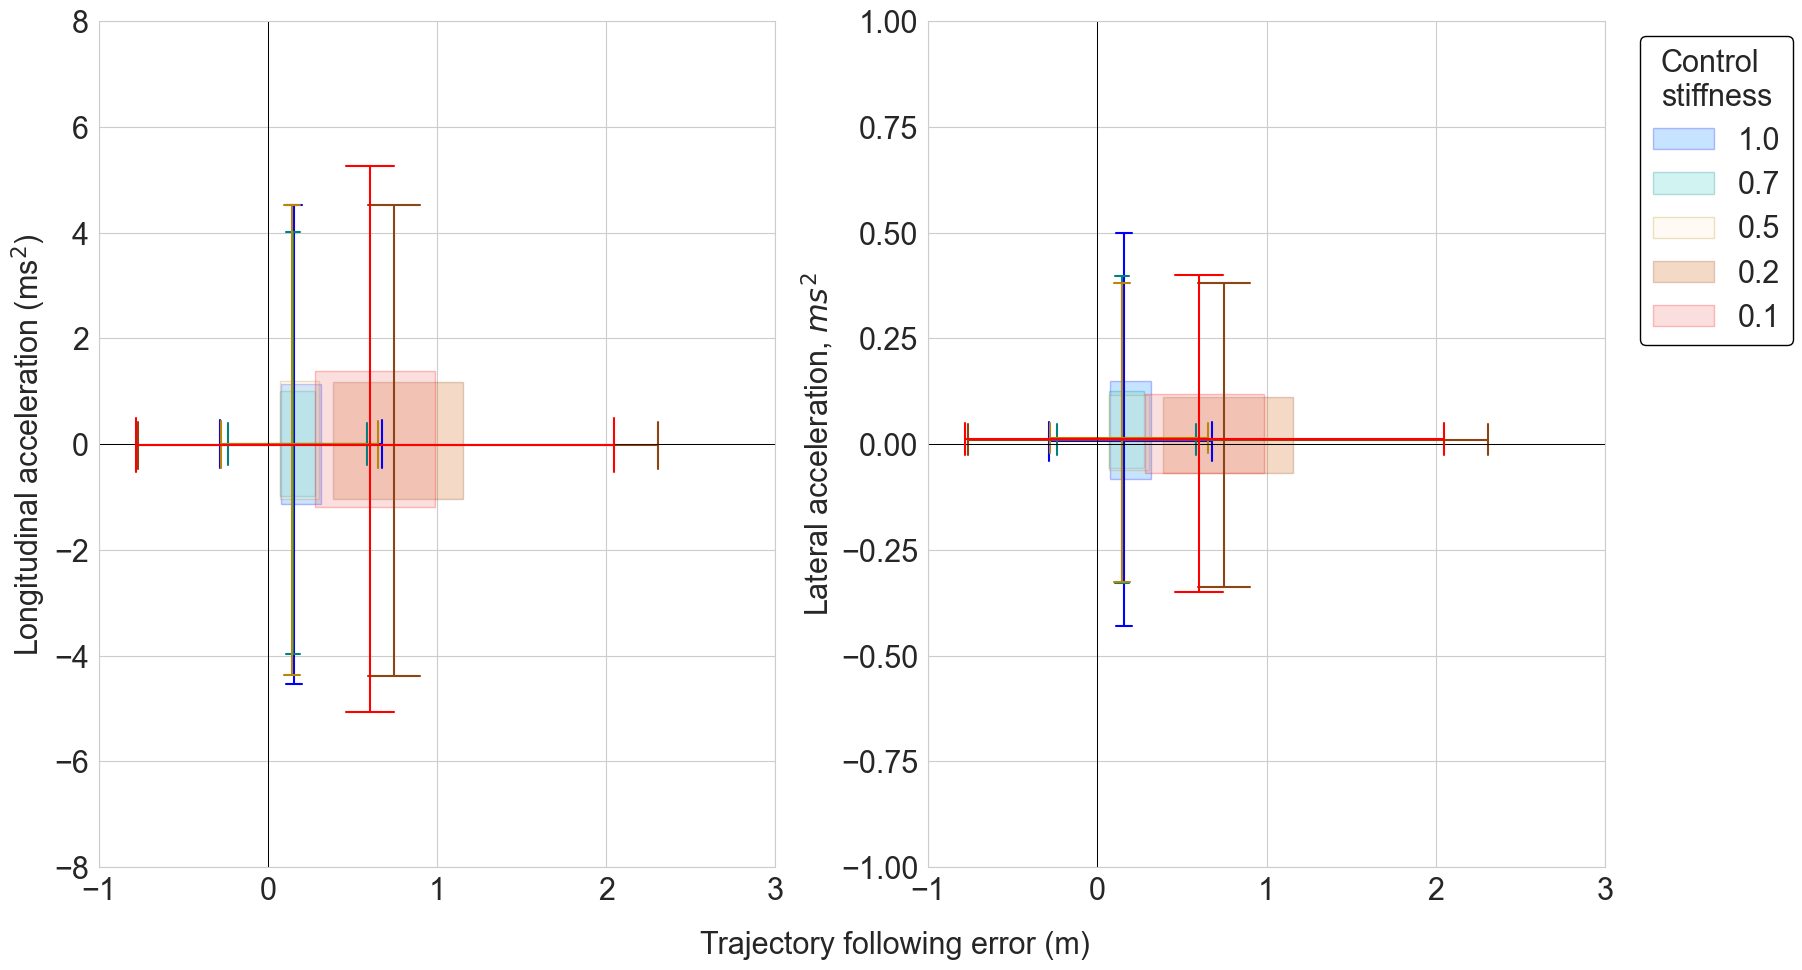

In [23]:
import pandas
import matplotlib as mpl

def plot_2dboxplot(ax, x, y, facecolor, edgecolor, linecolor, patchalpha, label):
    x_iqr = np.percentile(x, [25, 75])
    x_minmax = (np.percentile(x, 25) - 1.5*np.subtract(*np.percentile(x, [75, 25])), np.percentile(x, 75) + 1.5*np.subtract(*np.percentile(x, [75, 25])))
    x_median = np.median(x)
    y_iqr = np.percentile(y, [25, 75])
    y_minmax = (np.percentile(y, 25) - 1.5*np.subtract(*np.percentile(y, [75, 25])), np.percentile(y, 75) + 1.5*np.subtract(*np.percentile(y, [75, 25])))
    y_median = np.median(y)
    print(x_median, x_minmax)
    print(y_median, y_minmax)
    stickx = (x_iqr[1]-x_iqr[0])*0.2
    sticky = (y_iqr[1]-y_iqr[0])*0.2
    ax.plot([x_median, x_median], [y_minmax[0], y_minmax[1]], color=linecolor)
    ax.plot([x_median-stickx, x_median+stickx], [y_minmax[0], y_minmax[0]], color=linecolor)
    ax.plot([x_median-stickx, x_median+stickx], [y_minmax[1], y_minmax[1]], color=linecolor)
    ax.plot([x_minmax[0], x_minmax[1]], [y_median, y_median], color=linecolor)
    ax.plot([x_minmax[0], x_minmax[0]], [y_median-sticky, y_median+sticky], color=linecolor)
    ax.plot([x_minmax[1], x_minmax[1]], [y_median-sticky, y_median+sticky], color=linecolor)
    rect = Rectangle((x_iqr[0], y_iqr[0]), x_iqr[1]-x_iqr[0], y_iqr[1]-y_iqr[0], alpha=patchalpha, facecolor=facecolor, edgecolor=edgecolor, label=label)
    ax.add_patch(rect)

def plot_my_subplot(ax, x, y, label, xlim=([-0.5, 1]), ylim=([-8, 8]), setylabel=True, ylabel="", facecolor='dodgerblue', edgecolor='blue', linecolor='blue'):
    plt.sca(ax)
    ax.hlines(y=0.0, xmin=-99, xmax=99, linewidth=0.5, color='black')
    ax.vlines(x=0.0, ymin=-99, ymax=99, linewidth=0.5, color='black')
    ax.set_ylabel(ylabel, fontsize=textsize) if setylabel else None
    ax.tick_params(axis='x', labelsize=textsize)
    ax.tick_params(axis='y', labelsize=textsize)
    ax.set_ylim(ylim)
    ax.set_xlim(xlim)
    plot_2dboxplot(ax, x, y, facecolor=facecolor, edgecolor=edgecolor, linecolor=linecolor, patchalpha=0.25, label=label)
    [label.set_transform(label.get_transform() + offset) for label in ax.xaxis.get_majorticklabels()]


fig, axes = plt.subplots(1, 2, figsize=(18, 10))
textsize = 22
fig.suptitle("Trajectory following error (m)", fontsize=textsize, y=-0.01)
dx = 0.
dy = 0.
offset = mpl.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)

plot_my_subplot(axes[0], err1, data_100_filt_lon, setylabel=True, ylabel="Longitudinal acceleration (ms${{{}}}^{{{2}}}$)", label="100", xlim=(-1,3), facecolor='dodgerblue', edgecolor='blue', linecolor='blue')
plot_my_subplot(axes[0], err2, data_70_filt_lon, setylabel=False, label="70", xlim=(-1,3), facecolor='mediumturquoise', edgecolor='teal', linecolor='teal')
plot_my_subplot(axes[0], err3, data_50_filt_lon, setylabel=False, label="50", xlim=(-1,3), facecolor='papayawhip', edgecolor='darkgoldenrod', linecolor='darkgoldenrod')
plot_my_subplot(axes[0], err4, data_10_filt_lon, setylabel=False, label="20", xlim=(-1,3), facecolor='chocolate', edgecolor='saddlebrown', linecolor='saddlebrown')
plot_my_subplot(axes[0], err5, data_20_filt_lon, setylabel=False, label="10", xlim=(-1,3), facecolor='lightcoral', edgecolor='red', linecolor='red')

plot_my_subplot(axes[1], err1, data_100_filt_lat, setylabel=True, ylabel="Lateral acceleration, $m{{{}}}s^{{{2}}}$", label="1.0", xlim=(-1,3), ylim=(-1,1), facecolor='dodgerblue', edgecolor='blue', linecolor='blue')
plot_my_subplot(axes[1], err2, data_70_filt_lat, setylabel=False, label="0.7", xlim=(-1,3), ylim=(-1,1), facecolor='mediumturquoise', edgecolor='teal', linecolor='teal')
plot_my_subplot(axes[1], err3, data_50_filt_lat, setylabel=False, label="0.5", xlim=(-1,3), ylim=(-1,1), facecolor='papayawhip', edgecolor='darkgoldenrod', linecolor='darkgoldenrod')
plot_my_subplot(axes[1], err4, data_10_filt_lat, setylabel=False, label="0.2", xlim=(-1,3), ylim=(-1,1), facecolor='chocolate', edgecolor='saddlebrown', linecolor='saddlebrown')
plot_my_subplot(axes[1], err5, data_20_filt_lat, setylabel=False, label="0.1", xlim=(-1,3), ylim=(-1,1), facecolor='lightcoral', edgecolor='red', linecolor='red')

leg = axes[1].legend(loc='upper right', framealpha=1.0, bbox_to_anchor=(1.3, 1.0), edgecolor=(0.0, 0.0, 0.0), fontsize=textsize, title="Control\nstiffness")
plt.setp(leg.get_title(),fontsize=22)

fig.tight_layout()
fig.subplots_adjust(top=0.9)
plt.show()

In [305]:
from math import atan2, sin, cos, pi

def distance(x1: float, y1: float, x2: float, y2: float) -> float:
    d = np.sqrt(np.power((x2 - x1), 2) + np.power((y2 - y1), 2))
    return d

def normalize_angle(angle: float) -> float:
    return atan2(sin(angle), cos(angle))

def path_length(path: np.ndarray) -> float: # x, y [N, 2]
    return np.sum(np.sqrt(np.power((path[1:,0] - path[:-1,0]),2) + np.power((path[1:,1] - path[:-1,1]),2)))

def slope(x1: float, y1: float, x2: float, y2: float) -> float:
    dy = y2 - y1
    dx = x2 - x1
    return normalize_angle(atan2(dy,dx))

def get_cusps(path: np.ndarray) -> int: # x, y, theta [N, 3]
    cusps = 0
    for i in range(1,len(path)-1):
        yaw_prev = slope(path[i-1][0], path[i-1][1], path[i][0], path[i][1])
        yaw_next = slope(path[i][0], path[i][1], path[i+1][0], path[i+1][1])
        yaw_change = normalize_angle(yaw_next-yaw_prev)
        if yaw_change > 60*pi/180:
            cusps += 1
    return cusps

def AOL(path: np.ndarray) -> float: # x, y, theta [N, 3]
    path_len = path_length(path[:,:2])
    total_yaw_change = 0
    for i in range(1,len(path)-1):
        yaw_prev = slope(path[i-1][0], path[i-1][1], path[i][0], path[i][1])
        yaw_next = slope(path[i][0], path[i][1], path[i+1][0], path[i+1][1])
        yaw_change = normalize_angle(yaw_next-yaw_prev)
        total_yaw_change += yaw_change
    return total_yaw_change/path_len

def norm_curv(path: np.ndarray) -> float: # x, y, theta [N, 3]
    x1=x2=x3=y1=y2=y3 = 0
    normalized_k = 0
    eps = 1e-2
    max_curvature = 1e300

    for i in range(0,len(path)-2):
        x1 = path[i][0]
        y1 = path[i][1]
        while (True):
            i += 1
            if (i >= len(path)):
                return normalized_k
            x2 = path[i][0]
            y2 = path[i][1]
            if (distance(x1, y1, x2, y2) > 0.3):
                break

        while (True):
            i += 1
            if (i >= len(path)):
                return normalized_k
            x3 = path[i][0]
            y3 = path[i][1]
            if (distance(x2, y2, x3, y3) > 0.3):
                break

        if ((abs(abs(x1)-abs(x2)) < eps and abs(abs(y1)-abs(y2)) < eps) or \
            (abs(abs(x2)-abs(x3)) < eps and abs(abs(y2)-abs(y3)) < eps)):
            continue

        if (abs(abs(x1)-abs(x3)) < eps and abs(abs(y1)-abs(y3)) < eps):
            print("Infinite curvature in case the path goes a step backwards, skip calculation")
            continue
        
        cx = (np.power(x3, 2) * (-y1 + y2) + np.power(x2, 2) * (y1 - y3) - \
           (np.power(x1, 2) + (y1 - y2) * (y1 - y3)) * (y2 - y3)) / \
          (2. * (x3 * (-y1 + y2) + x2 * (y1 - y3) + x1 * (-y2 + y3)))
        
        cy = (-(np.power(x2, 2) * x3) + np.power(x1, 2) * (-x2 + x3) + \
           x3 * (np.power(y1, 2) - np.power(y2, 2)) + \
           x1 * (np.power(x2, 2) - np.power(x3, 2) + np.power(y2, 2) - \
                 np.power(y3, 2)) + \
           x2 * (np.power(x3, 2) - np.power(y1, 2) + np.power(y3, 2))) / \
          (2. * (x3 * (y1 - y2) + x1 * (y2 - y3) + x2 * (-y1 + y3)))

        radius = sqrt(np.power(x1 - cx, 2) + np.power(y1 - cy, 2))
        ki = 1. / radius
        ki = min(ki, max_curvature)
        normalized_k += ki * (distance(x1, y1, x2, y2) + distance(x2, y2, x3, y3))
        
    return normalized_k


def max_curv(path: np.ndarray) -> float: # x, y, theta [N, 3]
    x1=x2=x3=y1=y2=y3=v1x=v1y=v2x=v2y = 0
    eps = 1e-2
    max_curvature = 0
    inf = 1e300

    if len(path) == 0:
        return inf

    for i in range(0,len(path)-2):
        x1 = path[i][0]
        y1 = path[i][1]
        x2 = path[i+1][0]
        y2 = path[i+1][1]
        x3 = path[i+2][0]
        y3 = path[i+2][1]
        
        if ((abs(abs(x1)-abs(x2)) < eps and abs(abs(y1)-abs(y2)) < eps) or \
            (abs(abs(x2)-abs(x3)) < eps and abs(abs(y2)-abs(y3)) < eps)):
            continue
        
        if (abs(abs(x1)-abs(x3)) < eps and abs(abs(y1)-abs(y3)) < eps):
            print("Infinite curvature in case the path goes a step backwards, skip calculation")
            continue
        
        v1x = x1 - x2
        v1y = y1 - y2
        v2x = x3 - x2
        v2y = y3 - y2
        v1 = sqrt(v1x * v1x + v1y * v1y)
        v2 = sqrt(v2x * v2x + v2y * v2y)
        v1x = (0.5 * v1x * (v1 + v2)) / v1
        v1y = (0.5 * v1y * (v1 + v2)) / v1
        v2x = (0.5 * v2x * (v1 + v2)) / v2
        v2y = (0.5 * v2y * (v1 + v2)) / v2

        x1 = x2 + v1x
        y1 = y2 + v1y
        x3 = x2 + v2x
        y3 = y2 + v2y

        k_i = 2 * abs((x2 - x1) * (y3 - y1) - (x3 - x1) * (y2 - y1)) / \
                (sqrt(((x2 - x1) * (x2 - x1) + (y2 - y1) * (y2 - y1)) * \
                    ((x3 - x1) * (x3 - x1) + (y3 - y1) * (y3 - y1)) * \
                    ((x3 - x2) * (x3 - x2) + (y3 - y2) * (y3 - y2))))

        if (k_i > max_curvature):
            max_curvature = k_i

    return max_curvature


In [37]:
base_path = "C:/Users/user/Documents/pytorch-motion-planner"

# 100%
trajectory1 = np.load(f"{base_path}/dumps/cross_1/exp001/trajectory_1679439733.8771145.npy") # t x y theta
poses1 = np.load(f"{base_path}/dumps/cross_1/exp001/pose_dump_1679439779.6810696.npy") # x y t
# 50%
trajectory2 = np.load(f"{base_path}/dumps/cross_1/exp002/trajectory_1679441007.966667.npy") # t x y theta
poses2 = np.load(f"{base_path}/dumps/cross_1/exp002/pose_dump_1679441053.3258045.npy") # x y t
# 20%
trajectory3 = np.load(f"{base_path}/dumps/cross_1/exp003/trajectory_1679441748.71136.npy") # t x y theta
poses3 = np.load(f"{base_path}/dumps/cross_1/exp003/pose_dump_1679441794.0183184.npy") # x y t
# 10%
trajectory4 = np.load(f"{base_path}/dumps/cross_1/exp004/trajectory_1679442811.8211405.npy") # t x y theta
poses4 = np.load(f"{base_path}/dumps/cross_1/exp004/pose_dump_1679442857.2078366.npy") # x y t
# 70%
trajectory5 = np.load(f"{base_path}/dumps/cross_1/exp005/trajectory_1679442451.0765426.npy") # t x y theta
poses5 = np.load(f"{base_path}/dumps/cross_1/exp005/pose_dump_1679442496.6345513.npy") # x y t

trajectories = [trajectory1, trajectory5, trajectory2, trajectory3, trajectory4]
poses = [poses1, poses5, poses2, poses3, poses4]
aols = []
norm_curvs = []
max_curvs = []
path_lens = []
cusps = []

for trajectory, pose in zip(trajectories, poses):
    path = np.array(trajectory[:,1:])
    cusps.append(get_cusps(path))
    aols.append(AOL(path))
    norm_curvs.append(norm_curv(path))
    max_curvs.append(max_curv(path))
    path_lens.append(path_length(path[:,:2]))

for trajectory, pose in zip(trajectories, poses):
    path = np.array(pose[15:-15])
    cusps.append(get_cusps(path))
    aols.append(AOL(path))
    norm_curvs.append(norm_curv(path))
    max_curvs.append(max_curv(path))
    path_lens.append(path_length(path[:,:2]))


from tabulate import tabulate
rows = ["100%", "70%", "50%", "20%", "10%", "100%", "70%", "50%", "20%", "10%"]
headers = ["controls", "cusps", "AOL", "norm_curv", "max_curv", "path_len"]
print(tabulate([[row, cusp, aol, norm_curv, max_curv, path_len] for \
    row, cusp, aol, norm_curv, max_curv, path_len in \
    zip(rows, cusps, aols, norm_curvs, max_curvs, path_lens)], headers=headers))


controls      cusps          AOL    norm_curv    max_curv    path_len
----------  -------  -----------  -----------  ----------  ----------
100%              0  0.000151555      8.50139   0.119145      306.34
70%               0  0.000151555      8.50139   0.119145      306.34
50%               0  0.000151555      8.50139   0.119145      306.34
20%               0  0.000151555      8.50139   0.119145      306.34
10%               0  0.000151555      8.50139   0.119145      306.34
100%              4  0.0343589        7.08582   0.0721746     277.877
70%               2  0.0213167        7.20731  17.4461        289.388
50%              13  0.115369         7.39353   0.0755703     298.194
20%               5  0.00987241       7.55962   0.0780399     317.23
10%               5  0.0294247        7.48331  30.0926        319.755


In [49]:
nfomp100_cross = np.load(f"{base_path}/dumps/nfomp_trajectory_100_cross.npy") # x y theta
nfomp200_cross = np.load(f"{base_path}/dumps/nfomp_trajectory_200_cross.npy")
nfomp100_hotel = np.load(f"{base_path}/dumps/nfomp_trajectory_100_hotel.npy") 
nfomp200_hotel = np.load(f"{base_path}/dumps/nfomp_trajectory_200_hotel.npy")
nfomp100_harbor = np.load(f"{base_path}/dumps/nfomp_trajectory_100_harbor.npy")
nfomp200_harbor = np.load(f"{base_path}/dumps/nfomp_trajectory_200_harbor.npy")

dnfomp700_cross = np.load(f"{base_path}/dumps/dnfomp_trajectory_700_cross.npy")[:,1:]
dnfomp700_hotel = np.load(f"{base_path}/dumps/dnfomp_trajectory_700_hotel.npy")[:,1:]
dnfomp700_harbor = np.load(f"{base_path}/dumps/dnfomp_trajectory_700_harbor.npy")[:,1:]

aols = []
norm_curvs = []
max_curvs = []
path_lens = []
cusps = []
trajectories = [nfomp100_cross, nfomp200_cross, nfomp100_hotel, nfomp200_hotel, nfomp100_harbor, nfomp200_harbor,  dnfomp700_cross, dnfomp700_hotel, dnfomp700_harbor]

for pose in trajectories:
    path = np.array(pose)
    cusps.append(get_cusps(path))
    aols.append(AOL(path))
    norm_curvs.append(norm_curv(path))
    max_curvs.append(max_curv(path))
    path_lens.append(path_length(path[:,:2]))

from tabulate import tabulate
rows = ["nfomp100cross", "nfomp200cross",  "nfomp100hotel",  "nfomp200hotel", "nfomp100harbor", "nfomp200harbor", "dnfomp700cross", "dnfomp700hotel", "dnfomp700harbor"]
planning_t = [21.1, 43.0, 23.06, 44.8, 19.2, 38.4, 38.1, 41.9, 36.8]
headers = ["iterations", "cusps", "AOL", "norm_curv", "max_curv", "path_len", "time"]
print(tabulate([[row, cusp, aol, norm_curv, max_curv, path_len, planning_t] for \
    row, cusp, aol, norm_curv, max_curv, path_len, planning_t in \
    zip(rows, cusps, aols, norm_curvs, max_curvs, path_lens, planning_t)], headers=headers))


iterations         cusps          AOL    norm_curv    max_curv    path_len    time
---------------  -------  -----------  -----------  ----------  ----------  ------
nfomp100cross          0  -0.0010578      10.8892    0.126195      321.767   21.1
nfomp200cross          1   0.00179006     15.9412    0.272376      331.384   43
nfomp100hotel          0  -0.00641641     13.5645    0.13554       360.124   23.06
nfomp200hotel          0  -0.0100504      12.5875    0.0710806     366.395   44.8
nfomp100harbor         0   0.00111534     17.0348    0.217786      284.504   19.2
nfomp200harbor         0   0.00162984     17.5725    0.435817      281.515   38.4
dnfomp700cross         0  -0.00085556      8.15293   0.0581912     302.495   38.1
dnfomp700hotel         0  -0.00911093     10.1861    0.0702038     344.736   41.9
dnfomp700harbor        0  -0.00210381     13.4085    0.105515      264.901   36.8


In [ ]:
import matplotlib as mpl

data = np.array([[32.6, 321.7, 1, 0.12, 10.9, 1.05],
[38.1, 302.5, 0, 0.05, 8.15, 0.85],
[34.2, 360.1, 0, 0.07, 12.6, 1.0],
[41.9, 344.7, 0, 0.07, 10.2, 0.9],
[28.8, 281.2, 0, 0.21, 17.0, 1.1],
[36.8, 264.9, 0, 0.10, 13.4, 2.1]])

print(100*(1 -np.mean([data[0,0]/data[1,0], data[2,0]/data[3,0], data[4,0]/data[5,0]])))
m1 = np.mean([data[1,3]/data[0,3], data[3,3]/data[2,3], data[5,3]/data[4,3]])
m2 = np.mean([data[1,4]/data[0,4], data[3,4]/data[2,4], data[5,4]/data[4,4]])
m3 = np.mean([data[0,5]/data[1,5], data[2,5]/data[3,5], data[4,5]/data[5,5]])
print(100*(1 - np.mean([m1, m2, m3])))

def plot_my_barplot(ax, y, xlim=None, ylim=None, facecolor='dodgerblue', edgecolor=None):
    plt.sca(ax)
    x=[1,1.5,2.5,3,4,4.5]
    ax.tick_params(axis='x', labelsize=textsize)
    ax.tick_params(axis='y', labelsize=textsize)
    ax.set_xticks(x)
    ax.set_xticklabels(["Scenario 1\n\"Overpass\"", "", "Scenario 2\n\"Downtown\"", "", "Scenario 3\n\"Crossing\"", ""])
    # ax.set_xticks(range(xmin,xmax,10), minor=True)
    if (len(facecolor)==1):
        facecolor = np.full_like(x, facecolor)
    for xbar,ybar,fc in zip(x,y,facecolor):
        plt.bar(xbar, ybar, width=0.4, facecolor=fc, edgecolor=edgecolor, zorder=1000)
    [label.set_transform(label.get_transform() + offset) for label in ax.xaxis.get_majorticklabels()]

gray1 =np.array([88,145,173])/255
gray2 =np.array([0,69,97])/255
textsize = 22
dx = 0.5
dy = 0.
offset = mpl.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)


fig, ax = plt.subplots(1, 1, figsize=(10, 10))
fig.suptitle("Planning time (s)", fontsize=textsize, y=0.0)
plot_my_barplot(ax, y=data[:,0], facecolor=[gray1,gray2,gray1,gray2,gray1,gray2])
plt.grid()
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
fig.suptitle("Normalized curvature", fontsize=textsize, y=0.0)
plot_my_barplot(ax, y=data[:,4], facecolor=[gray1,gray2,gray1,gray2,gray1,gray2])
plt.grid()
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
fig.suptitle("Maximum curvature", fontsize=textsize, y=0.0)
plot_my_barplot(ax, y=data[:,3], facecolor=[gray1,gray2,gray1,gray2,gray1,gray2])
plt.grid()
plt.show()

PLanning time difference in %
18.183971426109867
Mean curvature difference in %


C:\Users\user\AppData\Local\Temp\ipykernel_13300\4125235039.py:18: RuntimeWarning: divide by zero encountered in scalar divide
  diff_cusps = np.mean([data[0,2]/data[1,2], data[2,2]/data[3,2], data[4,2]/data[5,2]])
C:\Users\user\AppData\Local\Temp\ipykernel_13300\4125235039.py:18: RuntimeWarning: invalid value encountered in scalar divide
  diff_cusps = np.mean([data[0,2]/data[1,2], data[2,2]/data[3,2], data[4,2]/data[5,2]])
C:\Users\user\AppData\Local\Temp\ipykernel_13300\4125235039.py:112: UserWarning: Legend does not support handles for Text instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  handles, labels = plt.gca().get_legend_handles_labels()


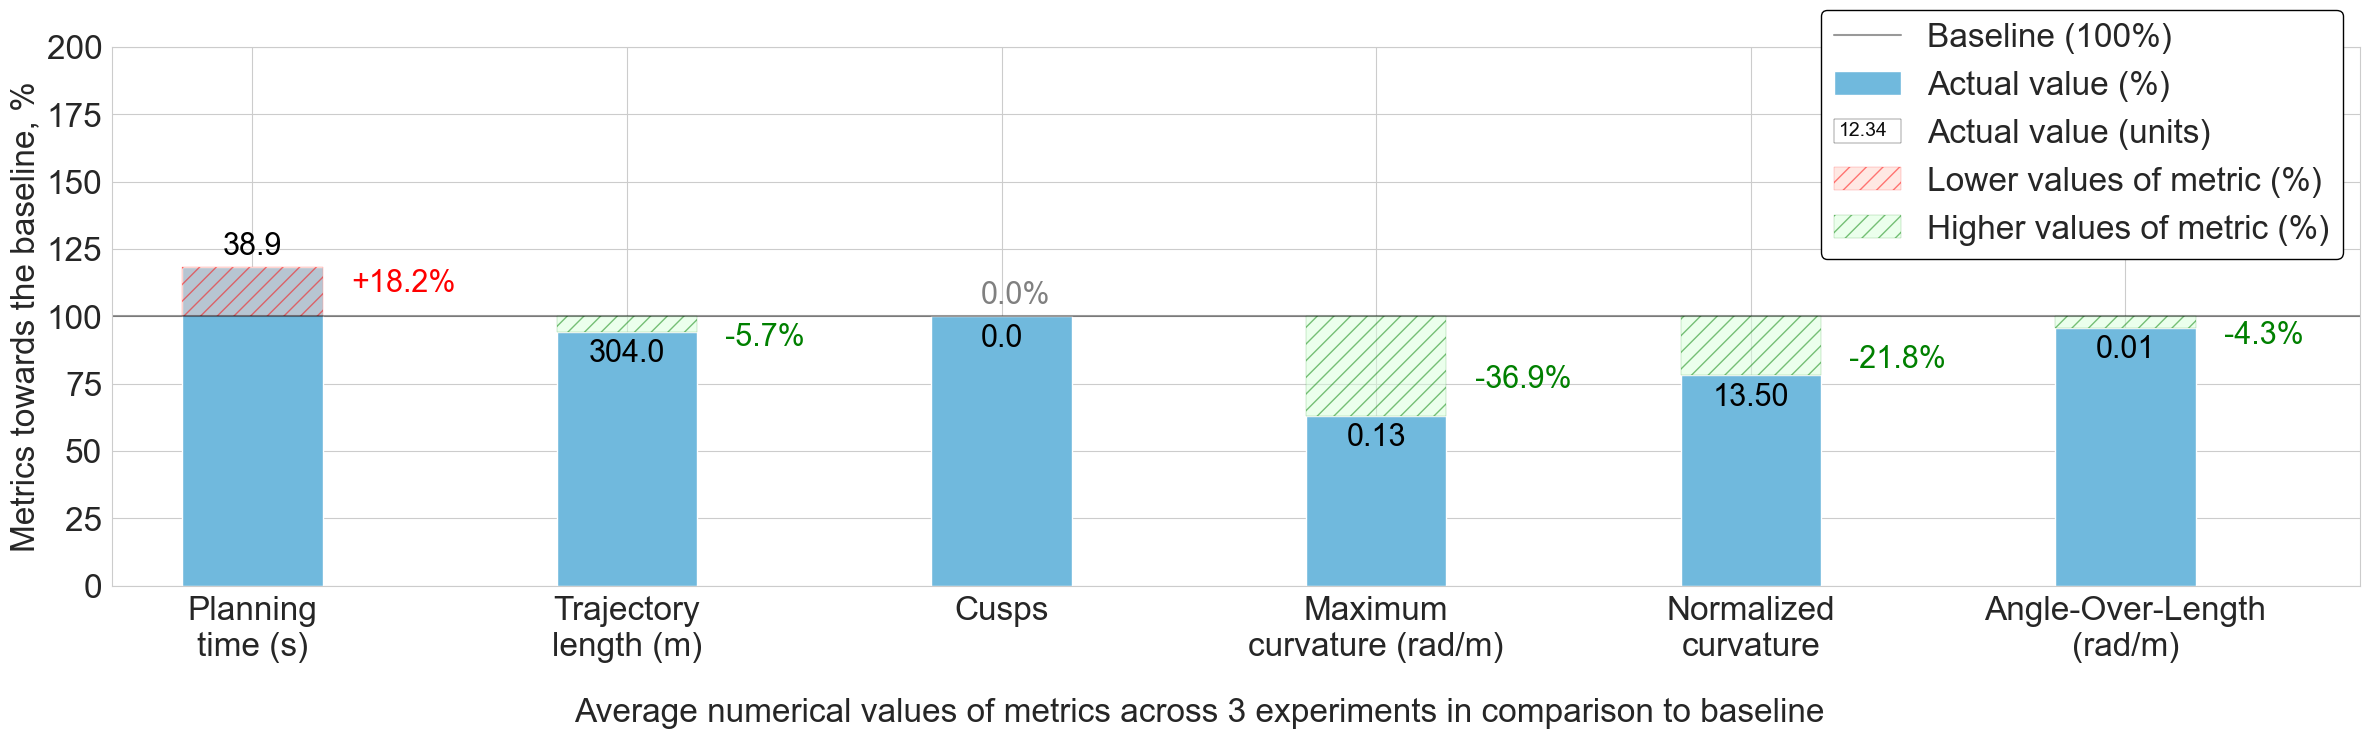

In [249]:
import matplotlib as mpl
            # time length cusps maxCurv normCurv AOL*100
data = np.array([[32.6, 321.7, 1, 0.12, 10.9, 0.0105], #nfomp overpass
                 [38.1, 302.5, 0, 0.05, 8.15, 0.0085], #dnfomp overpass
                 [34.2, 360.1, 0, 0.07, 12.6, 0.010],  # nfomp downtown
                 [41.9, 344.7, 0, 0.07, 10.2, 0.009],  #dnformp downtown
                 [28.8, 281.2, 0, 0.21, 17.0, 0.011],  #nfomp crossing
                 [36.8, 264.9, 0, 0.10, 13.4, 0.021]]) #dnfomp crossing

print("PLanning time difference in %")
print(100*(1 -np.mean([data[0,0]/data[1,0], data[2,0]/data[3,0], data[4,0]/data[5,0]])))
print("Mean curvature difference in %")

diff_time = np.mean([data[0,0]/data[1,0], data[2,0]/data[3,0], data[4,0]/data[5,0]])
mean_time = np.mean([data[1,0], data[3,0], data[5,0]])
diff_length = np.mean([data[0,1]/data[1,1], data[2,1]/data[3,1], data[4,1]/data[5,1]])
mean_length = np.mean([data[1,1], data[3,1], data[5,1]])
diff_cusps = np.mean([data[0,2]/data[1,2], data[2,2]/data[3,2], data[4,2]/data[5,2]])
mean_cusps = np.mean([data[1,2], data[3,2], data[5,2]])
diff_maxCurv = np.mean([data[1,3]/data[0,3], data[3,3]/data[2,3], data[5,3]/data[4,3]])
mean_maxCurv = np.mean([data[0,3], data[2,3],data[4,3]])
diff_normCurv = np.mean([data[1,4]/data[0,4], data[3,4]/data[2,4], data[5,4]/data[4,4]])
mean_normCurv = np.mean([data[0,4],data[2,4], data[4,4]])
diff_AOLx100 = np.mean([data[0,5]/data[1,5], data[2,5]/data[3,5], data[4,5]/data[5,5]])
mean_AOLx100 = np.mean([data[1,5], data[3,5], data[5,5]])


gray1 =np.array([88,145,173])/200
gray2 =np.array([0,69,97])/255
textsize = 24
dx = 0.5
dy = 0.
offset = mpl.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)

fig, ax = plt.subplots(1, 1, figsize=(29, 7))
plt.sca(ax)
x=np.linspace(1,5,6)
y=np.linspace(0,200,9)
ax.tick_params(axis='x', labelsize=textsize)
ax.tick_params(axis='y', labelsize=textsize)
ax.set_xticks(x)
ax.set_yticks(y)
ax.set_xticklabels(["Planning\ntime (s)",
"Trajectory\nlength (m)",
"Cusps",
"Maximum\ncurvature (rad/m)",
"Normalized\ncurvature\n",
"Angle-Over-Length\n(rad/m)"])

# for xbar,ybar,fc in zip(x,y,facecolor):
    
# [label.set_transform(label.get_transform() + offset) for label in ax.xaxis.get_majorticklabels()]
lightgreen = (216/255, 1., 219/255)
lightyellow = (1., 246/255, 183/255)
lightblue = (135/255, 221/255, 255/255)
lightred = (255/255, 210/255, 200/255)
hatch = '//'
d = 0.4
w1 = 0.3
textoffset = 8

plt.bar(x[0], 100+100*(1-diff_time), width=w1, facecolor=gray1, zorder=1, label='Actual value (%)')
worse = ax.add_patch(Rectangle((x[0]-w1/2, 100) ,w1, 100*(1-diff_time), fill=True, facecolor=lightred, hatch=hatch, alpha=0.5, edgecolor='red', linewidth=0.25))
worse.set_label('Lower values of metric (%)')
plt.text(x[0]+w1/2+w1/5, 100+100*(1-diff_time)/2, f"+{1-diff_time:.1%}", color='red', fontsize=22, label="text")
plt.text(x[0], 100+100*(1-diff_time)+textoffset, f"{mean_time:.1f}", color='black', fontsize=22,  horizontalalignment='center',verticalalignment='center',)

# ax.add_patch(Rectangle((-2., 0.14*g), data_cross[0,3], (0.25-0.14)*g, fill=True, facecolor=lightyellow, hatch=hatch, alpha=0.5, edgecolor=gray, linewidth=0.25))

plt.bar(x[1], 100+100*(1-diff_length), width=w1, facecolor=gray1, zorder=1)
better = ax.add_patch(Rectangle((x[1]-w1/2, 100) ,w1, 100*(1-diff_length), fill=True, facecolor=lightgreen, hatch=hatch, alpha=0.5, edgecolor='green', linewidth=0.25))
better.set_label('Higher values of metric (%)')
plt.text(x[1]+w1/2+w1/5, 100+100*(1-diff_length)/2-textoffset, f"{1-diff_length:.1%}", color='green', fontsize=22)
plt.text(x[1], 100+100*(1-diff_length)-textoffset, f"{mean_length:.1f}", color='black', fontsize=22,  horizontalalignment='center',verticalalignment='center',)


plt.bar(x[2], 100, width=w1, facecolor=gray1, zorder=1)
ax.add_patch(Rectangle((x[1]-w1/2, 100) ,w1, 100*(1-diff_cusps), fill=True, facecolor='gray', hatch=hatch, alpha=0.5, edgecolor='gray', linewidth=0.25))
plt.text(x[2]+w1/10, 100+textoffset, f"{0:.1%}", color='gray', fontsize=22, horizontalalignment='center',verticalalignment='center')
plt.text(x[2], 100-textoffset, f"{mean_cusps:.1f}", color='black', fontsize=22,  horizontalalignment='center',verticalalignment='center')


plt.bar(x[3], 100-100*(1-diff_maxCurv), width=w1, facecolor=gray1, zorder=1)
ax.add_patch(Rectangle((x[3]-w1/2, 100*(diff_maxCurv)) ,w1, 100*(1-diff_maxCurv), fill=True, facecolor=lightgreen, hatch=hatch, alpha=0.5, edgecolor='green', linewidth=0.25))
plt.text(x[3]+w1/2+w1/5, 100-100*(1-diff_maxCurv)/2-textoffset, f"-{1-diff_maxCurv:.1%}", color='green', fontsize=22)
plt.text(x[3], 100-100*(1-diff_maxCurv)-textoffset, f"{mean_maxCurv:.2f}", color='black', fontsize=22,  horizontalalignment='center',verticalalignment='center',)

plt.bar(x[4], 100-100*(1-diff_normCurv), width=w1, facecolor=gray1, zorder=1)
ax.add_patch(Rectangle((x[4]-w1/2, 100*(diff_normCurv)) ,w1, 100*(1-diff_normCurv), fill=True, facecolor=lightgreen, hatch=hatch, alpha=0.5, edgecolor='green', linewidth=0.25))
plt.text(x[4]+w1/2+w1/5, 100-100*(1-diff_normCurv)/2-textoffset, f"-{1-diff_normCurv:.1%}", color='green', fontsize=22)
plt.text(x[4], 100-100*(1-diff_normCurv)-textoffset, f"{mean_normCurv:.2f}", color='black', fontsize=22,  horizontalalignment='center',verticalalignment='center',)


plt.bar(x[5], 100-100*(1-diff_AOLx100), width=w1, facecolor=gray1, zorder=1)
ax.add_patch(Rectangle((x[5]-w1/2, 100*(diff_AOLx100)) ,w1, 100*(1-diff_AOLx100), fill=True, facecolor=lightgreen, hatch=hatch, alpha=0.5, edgecolor='green', linewidth=0.25))
plt.text(x[5]+w1/2+w1/5, 100-100*(1-diff_AOLx100)/2-textoffset, f"-{1-diff_AOLx100:.1%}", color='green', fontsize=22)
plt.text(x[5], 100-100*(1-diff_AOLx100)-textoffset, f"{mean_AOLx100:.2f}", color='black', fontsize=22,  horizontalalignment='center',verticalalignment='center',)

textbox = ax.add_patch(Rectangle((999,999), 1, 1, fill=True, facecolor='white', edgecolor='black', linewidth=0.25))
textbox.set_label("Actual value (units)")
plt.text(4.44, 169, f"12.34", fontsize=14,  horizontalalignment='center',verticalalignment='center',zorder=10000, color=(0.05,0.05,0.05))

nom = plt.plot([0, 100], [100, 100], alpha=0.4, color='black', label = 'Baseline (100%)')
ax.hlines(y=0.0, xmin=-99, xmax=99, linewidth=0.5, color='black')
ax.vlines(x=0.0, ymin=-99, ymax=99, linewidth=0.5, color='black')
ax.set_ylabel("Metrics towards the baseline, %", fontsize=textsize)
ax.tick_params(axis='x', labelsize=textsize)
ax.tick_params(axis='y', labelsize=textsize)
ax.set_ylim([0, 200])
ax.set_xlim(0.7,5.5)
order = [3,4,2,0,1]
handles, labels = plt.gca().get_legend_handles_labels()

ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order],loc='upper right', framealpha=1.0, bbox_to_anchor=(1.0, 1.1), edgecolor=(0.0, 0.0, 0.0), fontsize=textsize)
fig.suptitle("Average numerical values of metrics across 3 experiments in comparison to baseline", fontsize=textsize, y=-0.05)
plt.show()
